# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import io

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:
# To load dataset CSV in google colab
from google.colab import files
uploaded=files.upload()

Saving international_matches.csv to international_matches.csv


In [ ]:
# To read CSV uploaded on Google colab
data=pd.read_csv(io.BytesIO(uploaded['international_matches.csv']))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

# Visualisations

## 1. Distribution of number of matches played over 30 years

In [ ]:
from datetime import datetime

# convert the 'Date' column to datetime format
data['date']= pd.to_datetime(data['date'])

# get year from the date
data['year'] = pd.DatetimeIndex(data['date']).year
 
# get month from the date
data['month'] = pd.DatetimeIndex(data['date']).month

print(data.year.unique())
print(data.month.unique())

[1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022]
[ 8  9 10 11 12  1  2  3  4  5  6  7]


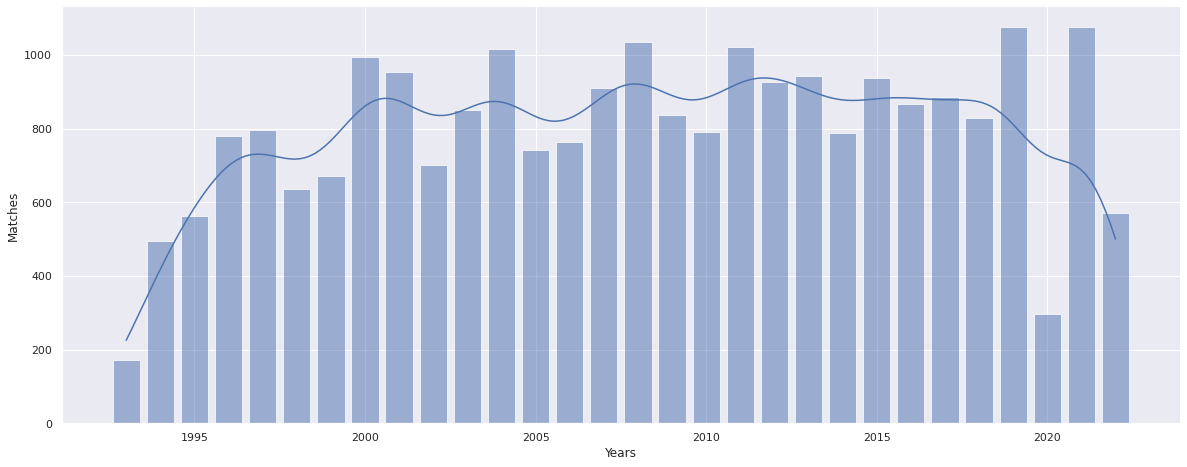

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

year_hist=sns.displot(data, x=data.year,discrete=True,shrink=.8, kde=True)
year_hist.set_axis_labels("Years", "Matches")


# When plot object already exist
fig = plt.gcf()
fig.set_size_inches(20, 7)

## 2. Distribution of number of matches played during the months over 30 years

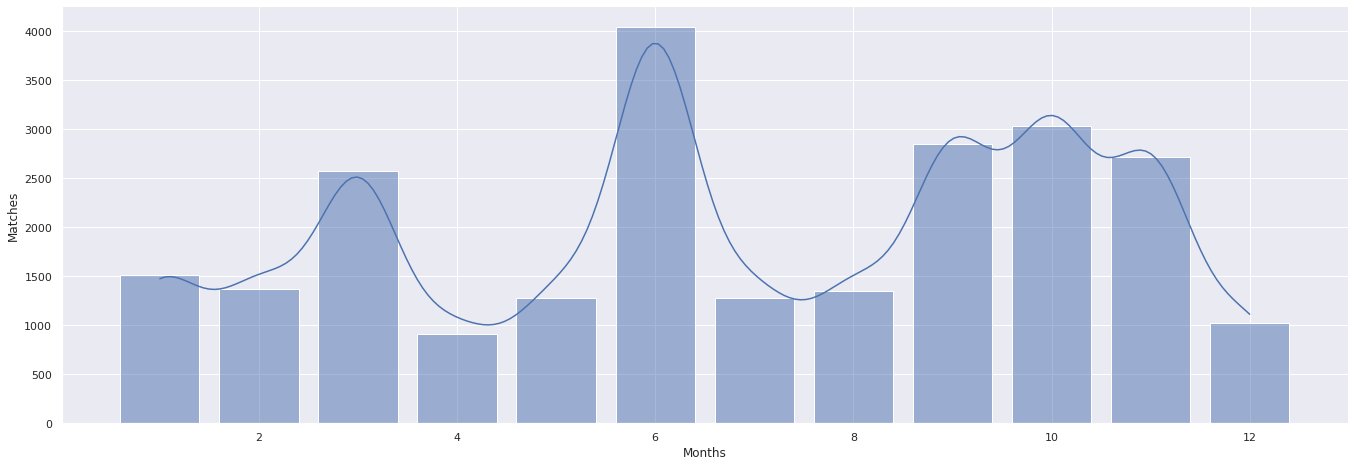

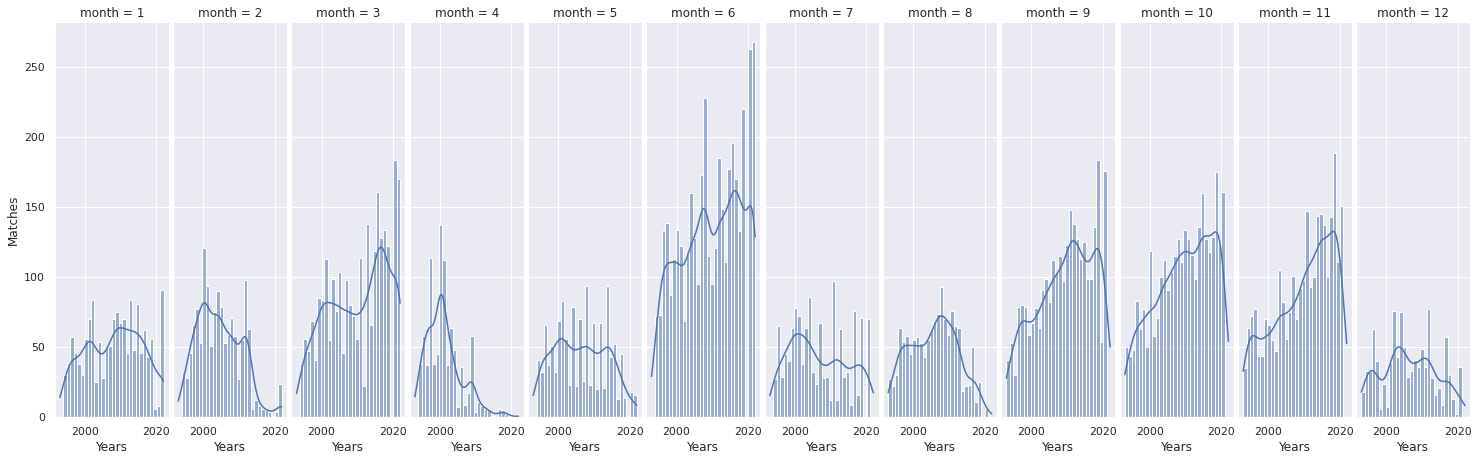

In [ ]:
month_yr_hist=sns.displot(data, x=data.month,discrete=True,shrink=.8, kde=True)
month_yr_hist.set_axis_labels("Months", "Matches")

# When plot object already exist
fig = plt.gcf()
fig.set_size_inches(23, 7)

month_hist=sns.displot(data, x=data.year,col=data.month, kde=True)
month_hist.set_axis_labels("Years", "Matches")

# When plot object already exist
fig = plt.gcf()
fig.set_size_inches(20, 7)


## 3. Top 10 most playing teams

In [ ]:
# Dataframe to identify total HOME matches played by each team
data['home_matches'] = data.groupby('home_team')['home_team'].transform('count')
Total_Matches_Home = pd.DataFrame(data[['home_team','home_matches']]).drop_duplicates(subset=['home_team']).sort_values(by=['home_matches'], ascending=False,ignore_index=True)
Total_Matches_Home.columns = ['Teams', 'Home Matches']
Total_Matches_Home = Total_Matches_Home.sort_values(by=['Home Matches'], ascending=False,ignore_index=True)

# Dataframe to identify total AWAY matches played by each team
data['away_matches'] = data.groupby('away_team')['away_team'].transform('count')
Total_Matches_Away = pd.DataFrame(data[['away_team','away_matches']]).drop_duplicates(subset=['away_team']).sort_values(by=['away_matches'], ascending=False,ignore_index=True)
Total_Matches_Away.columns = ['Teams', 'Away Matches']
Total_Matches_Away = Total_Matches_Away.sort_values(by=['Away Matches'], ascending=False,ignore_index=True)

# Dataframe to identify total matches played by each team
Total_Team_Matches = pd.merge(Total_Matches_Home,Total_Matches_Away, how='left')
Total_Team_Matches["Total Matches"] = Total_Team_Matches["Home Matches"] + Total_Team_Matches["Away Matches"]
Total_Team_Matches = Total_Team_Matches.sort_values(by=['Total Matches'], ascending=False,ignore_index=True)
print(Total_Team_Matches)

                        Teams  Home Matches  Away Matches  Total Matches
0                      Mexico           316           201            517
1                Saudi Arabia           272           199            471
2                         USA           314           150            464
3              Korea Republic           249           187            436
4                      Brazil           233           200            433
..                        ...           ...           ...            ...
206                Montserrat            18            18             36
207                     Samoa            22            14             36
208            American Samoa            17            14             31
209              Cook Islands            10            21             31
210  Turks and Caicos Islands             8            18             26

[211 rows x 4 columns]


             Teams  Home Matches  Away Matches  Total Matches
0           Mexico           316           201            517
1     Saudi Arabia           272           199            471
2              USA           314           150            464
3   Korea Republic           249           187            436
4           Brazil           233           200            433
5            Japan           280           145            425
6           Zambia           180           243            423
7            Qatar           249           156            405
8       Costa Rica           183           217            400
9             Oman           241           153            394
10         Germany           219           171            390


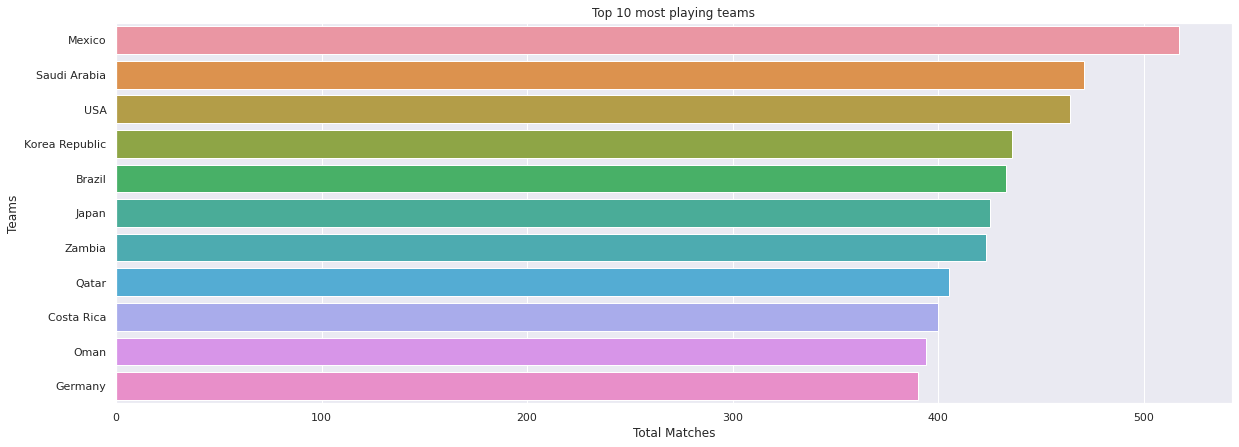

In [ ]:
# Treemaps
import plotly.express as px
treemap_total = px.treemap(Total_Team_Matches,
                 path=['Teams'],
                 values='Total Matches')
treemap_total.update_layout(title="Total matches by teams",
                  width=1000, height=700,)
treemap_total.show()

# Top 10 most playing teams
print(Total_Team_Matches.head(11))

# Bar plots
Top10_MostPlayingTeams = sns.barplot(data=Total_Team_Matches.head(11),y='Teams',x='Total Matches')
plt.xlabel("Total Matches")
plt.ylabel("Teams")
plt.title("Top 10 most playing teams")

# When plot object already exist
fig = plt.gcf()
fig.set_size_inches(20, 7)

plt.show(fig)

## 4. Top 10 teams playing most number of HOME matches

                   Teams  Home Matches
0                 Mexico           316
1                    USA           314
2                  Japan           280
3           Saudi Arabia           272
4         Korea Republic           249
5                  Qatar           249
6                   Oman           241
7   United Arab Emirates           239
8                 Brazil           233
9           South Africa           229
10                 Egypt           227


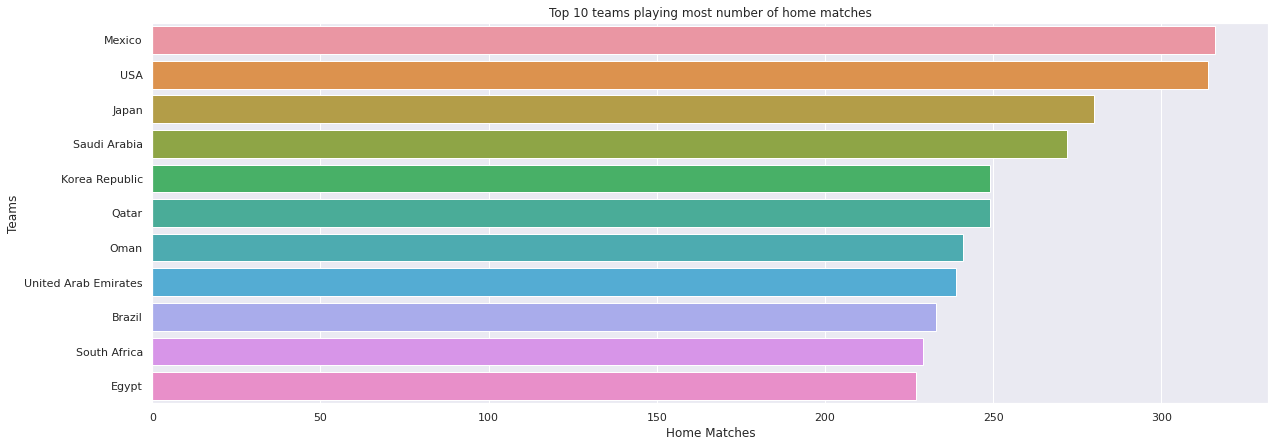

In [ ]:
# Treemaps
treemap_home = px.treemap(Total_Team_Matches,
                 path=['Teams'],
                 values='Home Matches')
treemap_home.update_layout(title="Total HOME matches by teams",
                  width=1000, height=700,)
treemap_home.show()

# Top 10 most playing teams
print(Total_Matches_Home.head(11))

# Bar plots
Top10_HomePlayTeams = sns.barplot(data=Total_Matches_Home.head(11),y='Teams',x='Home Matches')
plt.xlabel("Home Matches")
plt.ylabel("Teams")
plt.title("Top 10 teams playing most number of home matches")

# When plot object already exist
fig = plt.gcf()
fig.set_size_inches(20, 7)

plt.show(fig)



## 5. Top 10 teams playing most number of AWAY matches

           Teams  Away Matches
0         Zambia           243
1     Costa Rica           217
2       Paraguay           216
3         Sweden           206
4         Mexico           201
5         Brazil           200
6        Jamaica           199
7   Saudi Arabia           199
8           Iraq           199
9          Ghana           198
10      Colombia           198


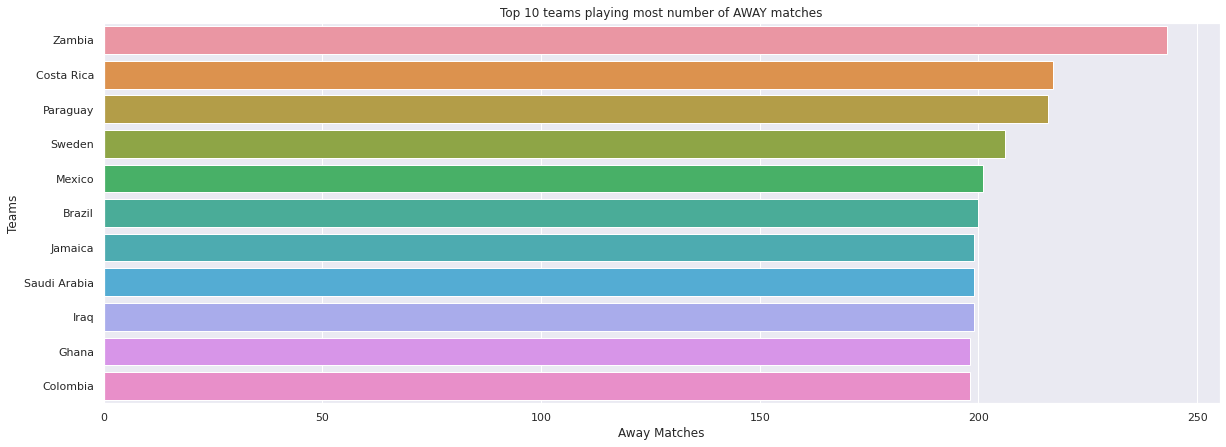

In [ ]:
# Treemaps
treemap_away = px.treemap(Total_Team_Matches,
                 path=['Teams'],
                 values='Away Matches')
treemap_away.update_layout(title="Total AWAY matches by teams",
                  width=1000, height=700,)
treemap_away.show()

# Top 10 most playing teams
print(Total_Matches_Away.head(11))

# Bar plots
Top10_HomePlayTeams = sns.barplot(data=Total_Matches_Away.head(11),y='Teams',x='Away Matches')
plt.xlabel("Away Matches")
plt.ylabel("Teams")
plt.title("Top 10 teams playing most number of AWAY matches")

# When plot object already exist
fig = plt.gcf()
fig.set_size_inches(20, 7)

plt.show(fig)

## 6. Top continents by number of matches played

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 10.4 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


       continent  Home Matches  Away Matches  Home_Away  Total Matches
0         Europe          7593          7359       6529           8423
1         Africa          5885          6306       5471           6720
2           Asia          5302          4817       4146           5973
3  North America          2772          2703       1949           3526
4  South America          1839          2161       1081           2919
5        Oceania           530           575        328            777


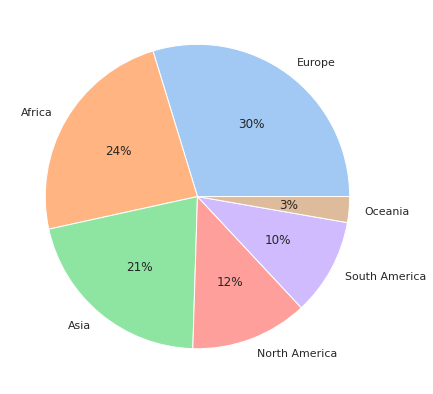

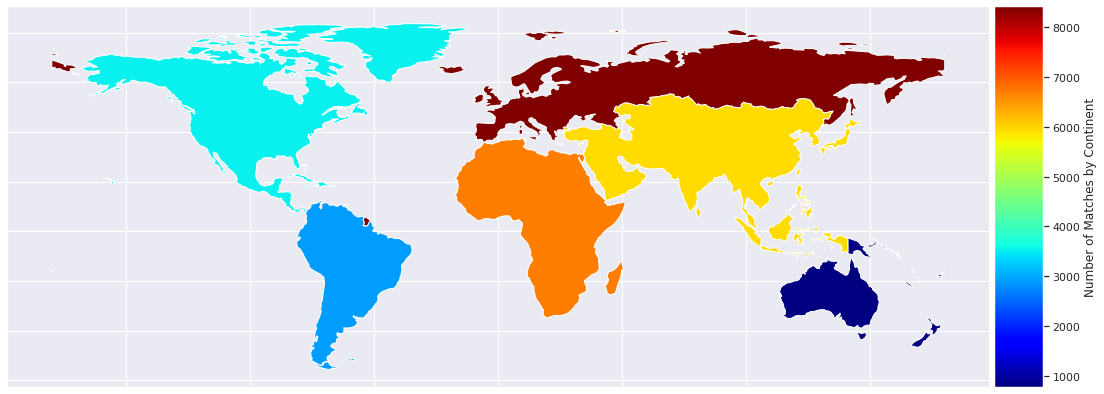

In [ ]:
# Create new column to merge 'home_team_continent' and 'away_team_continent' for counting them as 1
data['Home_Away'] = data['home_team_continent'] + ' - ' + data['away_team_continent']
data['Home_Away']

# Dataframe to identify total HOME matches played by each continent
data['continent_home_matches'] = data.groupby('home_team_continent')['home_team_continent'].transform('count')
Total_Matches_Home_continent = pd.DataFrame(data[['home_team_continent','continent_home_matches']]).drop_duplicates(subset=['home_team_continent']).sort_values(by=['continent_home_matches'], ascending=False,ignore_index=True)
Total_Matches_Home_continent.columns = ['continent', 'Home Matches']
Total_Matches_Home_continent = Total_Matches_Home_continent.sort_values(by=['Home Matches'], ascending=False,ignore_index=True)

# Dataframe to identify total AWAY matches played by each continent
data['continent_away_matches'] = data.groupby('away_team_continent')['away_team_continent'].transform('count')
Total_Matches_Away_continent = pd.DataFrame(data[['away_team_continent','continent_away_matches']]).drop_duplicates(subset=['away_team_continent']).sort_values(by=['continent_away_matches'], ascending=False,ignore_index=True)
Total_Matches_Away_continent.columns = ['continent', 'Away Matches']
Total_Matches_Away_continent = Total_Matches_Away_continent.sort_values(by=['Away Matches'], ascending=False,ignore_index=True)

# Dataframe to identify total matches played in each continent
Total_continent_Matches = pd.merge(Total_Matches_Home_continent,Total_Matches_Away_continent, how='left')
Total_continent_Matches["Home_Away"] = (Total_continent_Matches["Home Matches"] + Total_continent_Matches["Away Matches"])
Total_continent_Matches.loc[0,"Home_Away"]=data['Home_Away'].value_counts()['Europe - Europe']
Total_continent_Matches.loc[1,"Home_Away"]=data['Home_Away'].value_counts()['Africa - Africa']
Total_continent_Matches.loc[2,"Home_Away"]=data['Home_Away'].value_counts()['Asia - Asia']
Total_continent_Matches.loc[3,"Home_Away"]=data['Home_Away'].value_counts()['North America - North America']
Total_continent_Matches.loc[4,"Home_Away"]=data['Home_Away'].value_counts()['South America - South America']
Total_continent_Matches.loc[5,"Home_Away"]=data['Home_Away'].value_counts()['Oceania - Oceania']
Total_continent_Matches["Total Matches"] = ((Total_continent_Matches["Home Matches"] + Total_continent_Matches["Away Matches"]) - Total_continent_Matches["Home_Away"])
#Total_continent_Matches.drop('Home_Away', inplace=True, axis=1)
print(Total_continent_Matches)


# plotting data on chart
plt.pie(Total_continent_Matches['Total Matches'], labels=Total_continent_Matches['continent'], colors=sns.color_palette('pastel'), autopct='%.0f%%')
fig = plt.gcf()
fig.set_size_inches(100, 7)
plt.show(fig)
  
#pip install geopandas
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry']]
continents = world.dissolve(by='continent')
continents  = continents.merge(Total_continent_Matches, on='continent', how='left')
continents_gdf = geopandas.GeoDataFrame(continents)

# Geopandas plot
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax=divider.append_axes("right", size="5%", pad=0.05)
ax = continents_gdf.plot(column='Total Matches',
                         cmap='jet',
                         ax=ax,
                         legend=True,
                         cax=cax,
                         legend_kwds={'label': "Number of Matches by Continent"}
                        #'orientation': "horizontal"}
                         )
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
#plt.title('Number of Matches by Continent',loc='center')
plt.box(True)
# When plot object already exist
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

In [ ]:
pip install folium matplotlib mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Interactive map
#pip install folium matplotlib mapclassify
continents_gdf.explore(
     column="Total Matches", # make choropleth based on "BoroName" column
     tooltip="Total Matches", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     #tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="jet", # use "Set1" matplotlib colormap
     style_kwds=dict(color="black"), # use black outline
     #width = 600,
     #height = 300,
     
     )

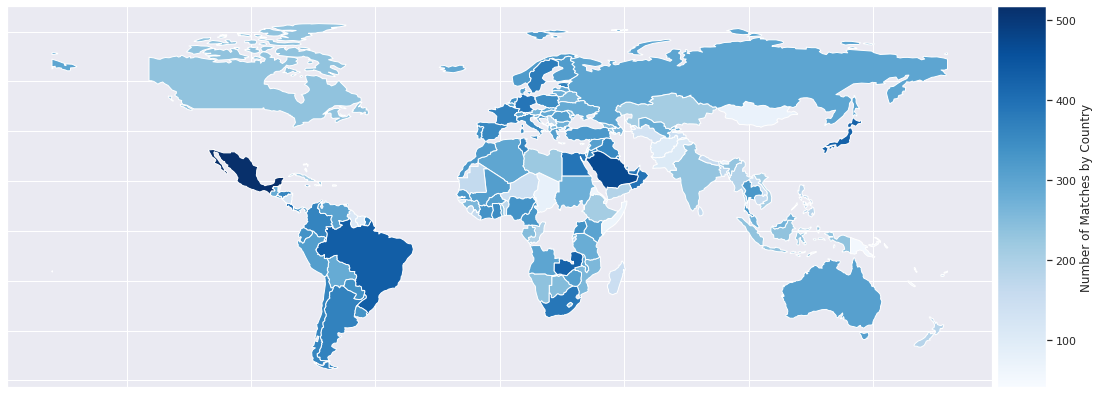

In [ ]:
world1 = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world1 = world1[['name', 'geometry']]
country = world1.dissolve(by='name')
Total_Team_Matches1 = Total_Team_Matches
Total_Team_Matches1.columns = ['name','Home Matches','Away Matches','Total Matches']
country = country.merge(Total_Team_Matches1, on='name', how='left')
country_gdf = geopandas.GeoDataFrame(country)
country_gdf

# Geopandas plot
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax=divider.append_axes("right", size="5%", pad=0.05)
ax = country_gdf.plot(column='Total Matches',
                         cmap='Blues',
                         ax=ax,
                         legend=True,
                         cax=cax,
                         legend_kwds={'label': "Number of Matches by Country"}
                        #'orientation': "horizontal"}
                         )
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
#plt.title('Number of Matches by Continent',loc='center')
plt.box(True)
# When plot object already exist
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

country_gdf.explore(
     column="Total Matches", # make choropleth based on "BoroName" column
     tooltip="Total Matches", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     #tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="jet", # use "Set1" matplotlib colormap
     style_kwds=dict(color="black") # use black outline
     #width = 600,
     #height = 300,
     )

## 7. Top 10 Teams who won Most Away Matches

          Teams  Away Wins
0        Brazil        120
1         Spain        101
2       Germany        101
3        Zambia         88
4     Argentina         86
5        France         85
6       IR Iran         84
7        Sweden         83
8        Mexico         82
9   Netherlands         82
10      Croatia         80


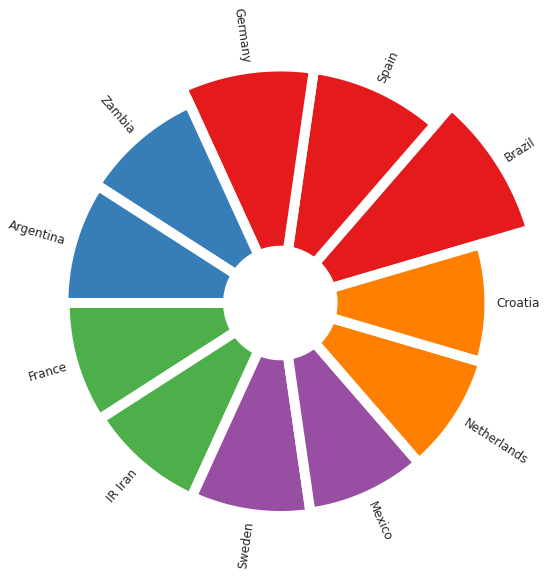

In [ ]:
away_wins = data[['away_team','home_team_result']]
values = ['Lose']
away_wins = away_wins[away_wins['home_team_result'].isin(values)]
away_wins['total_wins'] = away_wins.groupby('away_team')['away_team'].transform('count')
away_wins = pd.DataFrame(away_wins[['away_team','total_wins']]).drop_duplicates(subset=['away_team']).sort_values(by=['total_wins'], ascending=False,ignore_index=True)
away_wins.columns = ['Teams', 'Away Wins']
top_away_wins = away_wins.head(11)
print(top_away_wins)

# set figure size
plt.figure(figsize=(20,10))
# plot polar axis
ax = plt.subplot(111, polar=True)
# remove grid
plt.axis('off')
# Set the coordinates limits
upperLimit = 100
lowerLimit = 30
# Compute max and min in the dataset
max = top_away_wins['Away Wins'].max()
# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * top_away_wins['Away Wins'] + lowerLimit
# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(top_away_wins.index)
# Compute the angle each bar is centered on:
indexes = list(range(1, len(top_away_wins.index)+1))
angles = [element * width for element in indexes]
angles
# Bar colors
#import matplotlib.cm
#print(matplotlib.cm.cmap_d.keys())
colors = plt.cm.Set1(np.linspace(0, 0.5, len(top_away_wins['Away Wins'])))
# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=10, 
    edgecolor="white",
    color=colors
    )

# little space between the bar and the label
labelPadding = 4
# Add labels
for bar, angle, height, label in zip(bars,angles, heights, top_away_wins["Teams"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

             Teams  Home Wins
0              USA        194
1           Mexico        190
2           Brazil        181
3     Saudi Arabia        164
4            Egypt        163
5            Japan        154
6           France        145
7            Spain        145
8   Korea Republic        140
9          Germany        139
10         IR Iran        133


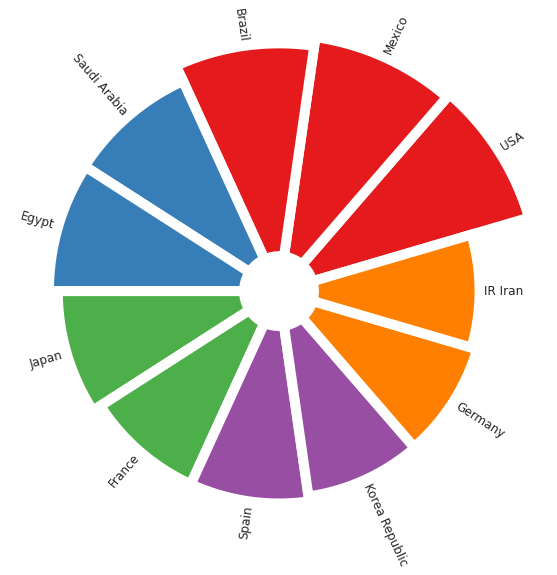

In [ ]:
home_wins = data[['home_team','home_team_result']]
values = ['Win']
home_wins = home_wins[home_wins['home_team_result'].isin(values)]
home_wins['total_wins'] = home_wins.groupby('home_team')['home_team'].transform('count')
home_wins = pd.DataFrame(home_wins[['home_team','total_wins']]).drop_duplicates(subset=['home_team']).sort_values(by=['total_wins'], ascending=False,ignore_index=True)
home_wins.columns = ['Teams', 'Home Wins']
top_home_wins = home_wins.head(11)
print(top_home_wins)

# set figure size
plt.figure(figsize=(20,10))
# plot polar axis
ax = plt.subplot(111, polar=True)
# remove grid
plt.axis('off')
# Set the coordinates limits
upperLimit = 100
lowerLimit = 30
# Compute max and min in the dataset
max = top_home_wins['Home Wins'].max()
# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * top_home_wins['Home Wins'] + lowerLimit
# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(top_home_wins.index)
# Compute the angle each bar is centered on:
indexes = list(range(1, len(top_home_wins.index)+1))
angles = [element * width for element in indexes]
angles
# Bar colors
#import matplotlib.cm
#print(matplotlib.cm.cmap_d.keys())
colors = plt.cm.Set1(np.linspace(0, 0.5, len(top_home_wins['Home Wins'])))
# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=10, 
    edgecolor="white",
    color=colors
    )

# little space between the bar and the label
labelPadding = 4
# Add labels
for bar, angle, height, label in zip(bars,angles, heights, top_home_wins["Teams"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

## 8. Top 10 FIFA Teams by rank

In [ ]:
#teams = Total_Team_Matches.name.loc[data['year'] == 1993].tolist()
#year_values = data.year.unique()
#rank_df1 = data[(data['home_team'].isin(teams)) | (data['away_team'].isin(teams))].loc[data['year'] == 1993].sort_values(['date','home_team_fifa_rank','away_team_fifa_rank'], ascending=[False,True,True])#.iloc[0]
#rank_df1
#rank_df1.loc[rank_df1['year'] == 1993]

teams = Total_Team_Matches.name.tolist()
ranks = [] 
for x in teams: 
  rank_df = data[(data['home_team']== x) | (data['away_team']== x)].sort_values(['date','home_team_fifa_rank','away_team_fifa_rank'], ascending=[False,True,True]).iloc[0] 
  if rank_df['home_team']==x: 
      rank = rank_df['home_team_fifa_rank'] 
  else: rank = rank_df['away_team_fifa_rank'] 
  ranks.append(rank) 

team_ranks = pd.DataFrame({'team':teams, 'Rank': ranks}).sort_values('Rank').reset_index(drop=True) 
#team_ranks.index += 1 
team_ranks.head(10)
 

team  Rank
0       Brazil     1
1      Belgium     2
2       France     3
3    Argentina     4
4      England     5
5        Italy     6
6        Spain     7
7     Portugal     8
8       Mexico     9
9  Netherlands    10

## 9. Home Team Advantage

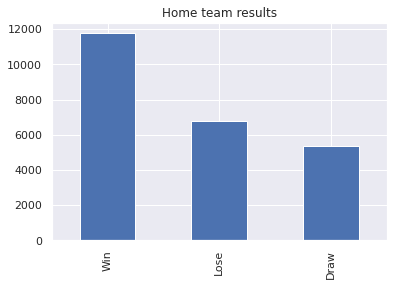

In [ ]:
match_results = pd.DataFrame(data['home_team_result'].value_counts().sort_values(ascending=False))
match_results.plot(kind='bar', title='Home team results',legend=False)

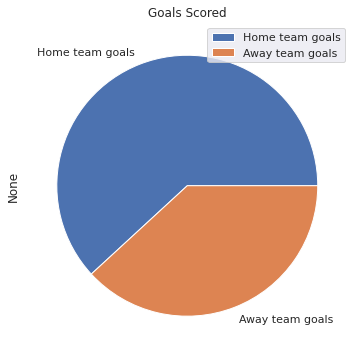

In [ ]:
match_score = data[['date','home_team_score','away_team_score']]
home_more = match_score.loc[match_score['home_team_score']>match_score['away_team_score']]
away_more = match_score.loc[match_score['home_team_score']<match_score['away_team_score']]
match_score_HomeAway = home_more.append(away_more)

match_score_HomeAway.sum().plot(kind='pie', title='Goals Scored', labels =['Home team goals','Away team goals'], figsize=(6,6))
plt.legend();

## 10. Top teams with offense

            date       team  offense_score
23741 2022-06-05  Argentina           89.0
23885 2022-06-13     France           88.3
23906 2022-06-14    England           88.0
23760 2022-06-06     Brazil           86.3
23867 2022-06-12   Portugal           86.0
23909 2022-06-14    Belgium           85.7
23907 2022-06-14      Italy           85.3
23866 2022-06-12      Spain           85.0
23909 2022-06-14     Poland           84.7
23862 2022-06-11    Uruguay           84.3


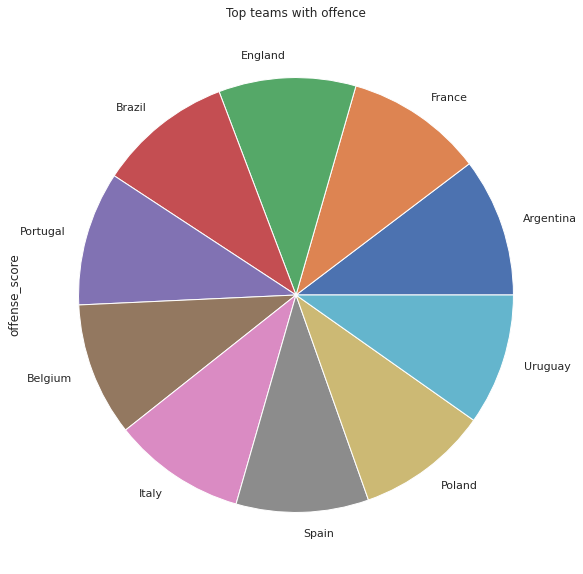

In [ ]:
offense = data[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home = offense [['date', 'home_team','home_team_mean_offense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_offense_score' : 'offense_score'})
away = offense [['date', 'away_team','away_team_mean_offense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_offense_score' : 'offense_score'})
offense  = home.append(away)

#last match that each country played
offense   = offense .sort_values(['team', 'date'], ascending=[True, False])
offense ['row_number'] = offense .groupby('team').cumcount()+1
offense_top_data = offense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'offense_score')
print(offense_top_data)

offense_top_data.offense_score.plot(kind='pie', title='Top teams with offence', labels = offense_top_data.team, figsize=(10,10))
#plt.legend();

# MAY USE BAR CHART here

## 11. Top teams with defense

            date         team  defense_score
23866 2022-06-12        Spain           86.5
23908 2022-06-14  Netherlands           85.2
23867 2022-06-12     Portugal           85.2
23906 2022-06-14      England           85.0
23760 2022-06-06       Brazil           84.8
23885 2022-06-13       France           84.2
23907 2022-06-14        Italy           84.2
23907 2022-06-14      Germany           84.0
23741 2022-06-05    Argentina           82.2
23879 2022-06-13      Morocco           81.2


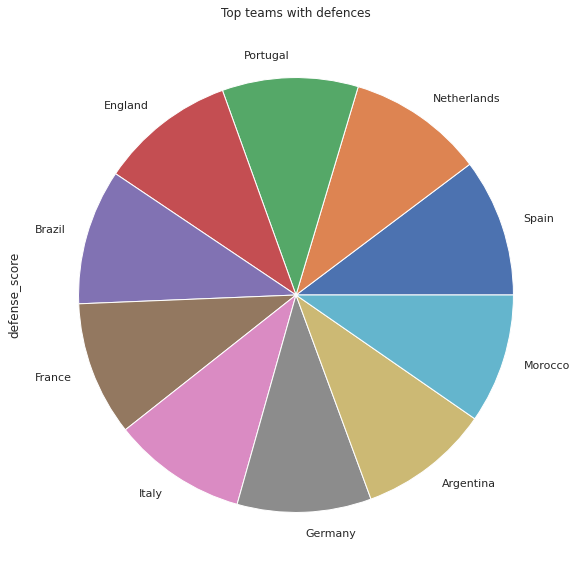

In [ ]:
defense = data[['date', 'home_team', 'away_team', 'home_team_mean_defense_score', 'away_team_mean_defense_score']]
home = defense [['date', 'home_team','home_team_mean_defense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_defense_score' : 'defense_score'})
away = defense [['date', 'away_team','away_team_mean_defense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_defense_score' : 'defense_score'})
defense  = home.append(away)
# offense
#last match that each country played
defense   = defense .sort_values(['team', 'date'], ascending=[True, False])
defense ['row_number'] = defense .groupby('team').cumcount()+1
defense_top_data = defense [defense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'defense_score')
print(defense_top_data)

defense_top_data.defense_score.plot(kind='pie', title='Top teams with defences', labels = defense_top_data.team, figsize=(10,10))
#plt.legend();

## 12. Top teams with Midfield

            date       team  midfield_score
23907 2022-06-14    Germany            87.8
23885 2022-06-13     France            86.8
23866 2022-06-12      Spain            86.0
23909 2022-06-14    Belgium            85.5
23760 2022-06-06     Brazil            85.5
23907 2022-06-14      Italy            84.5
23867 2022-06-12   Portugal            84.5
23885 2022-06-13    Croatia            84.2
23741 2022-06-05  Argentina            84.0
23906 2022-06-14    England            84.0


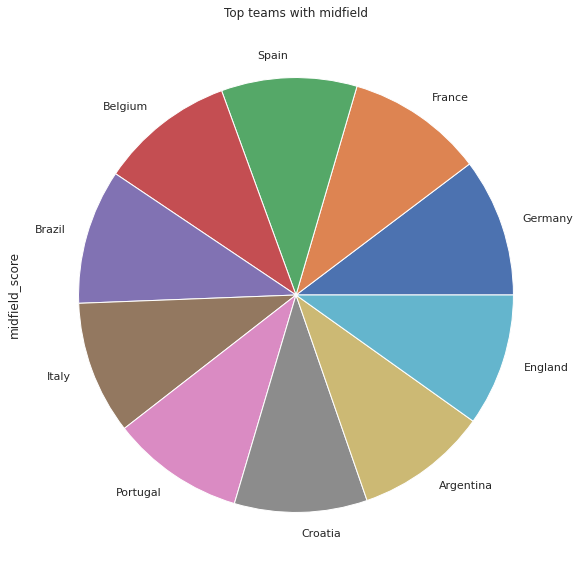

In [ ]:
midfield = data[['date', 'home_team', 'away_team', 'home_team_mean_midfield_score', 'away_team_mean_midfield_score']]
home = midfield [['date', 'home_team','home_team_mean_midfield_score']].rename(columns = {'home_team': 'team', 'home_team_mean_midfield_score' : 'midfield_score'})
away = midfield [['date', 'away_team','away_team_mean_midfield_score']].rename(columns = {'away_team': 'team', 'away_team_mean_midfield_score' : 'midfield_score'})
midfield  = home.append(away)
# offense
#last match that each country played
midfield   = midfield .sort_values(['team', 'date'], ascending=[True, False])
midfield ['row_number'] = midfield .groupby('team').cumcount()+1
midfield_top_data = midfield [midfield ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'midfield_score')
print(midfield_top_data)

midfield_top_data.midfield_score.plot(kind='pie', title='Top teams with midfield', labels = midfield_top_data.team, figsize=(10,10))
#plt.legend();

## 13. Top teams with Goalkeeper score

            date        team  goalkeeper_score
23869 2022-06-12    Slovenia              91.0
23907 2022-06-14     Germany              90.0
23909 2022-06-14     Belgium              89.0
23760 2022-06-06      Brazil              89.0
23907 2022-06-14       Italy              89.0
23890 2022-06-14  Costa Rica              88.0
23885 2022-06-13      France              87.0
23909 2022-06-14      Poland              87.0
23884 2022-06-13     Denmark              85.0
23906 2022-06-14     Hungary              85.0


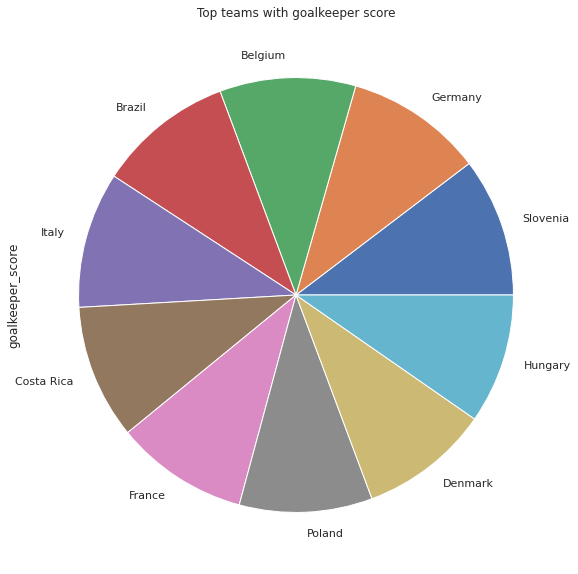

In [ ]:
goalkeeper = data[['date', 'home_team', 'away_team', 'home_team_goalkeeper_score', 'away_team_goalkeeper_score']]
home = goalkeeper [['date', 'home_team','home_team_goalkeeper_score']].rename(columns = {'home_team': 'team', 'home_team_goalkeeper_score' : 'goalkeeper_score'})
away = goalkeeper [['date', 'away_team','away_team_goalkeeper_score']].rename(columns = {'away_team': 'team', 'away_team_goalkeeper_score' : 'goalkeeper_score'})
goalkeeper  = home.append(away)
# Goalkeeper
#last match that each country played
goalkeeper   = goalkeeper .sort_values(['team', 'date'], ascending=[True, False])
goalkeeper ['row_number'] = goalkeeper.groupby('team').cumcount()+1
goalkeeper_top_data = goalkeeper [goalkeeper ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'goalkeeper_score')
print(goalkeeper_top_data)

goalkeeper_top_data.goalkeeper_score.plot(kind='pie', title='Top teams with goalkeeper score', labels = goalkeeper_top_data.team, figsize=(10,10))
#plt.legend();

## 14. Overall mean score by teams

In [ ]:
offense_df = offense [offense ['row_number']==1].drop('row_number',axis=1)
defense_df = defense [defense ['row_number']==1].drop('row_number',axis=1)
midfield_df = midfield [midfield ['row_number']==1].drop('row_number',axis=1)
goalkeeper_df = goalkeeper [goalkeeper ['row_number']==1].drop('row_number',axis=1)

all_score = offense_df.merge(defense_df, on='team', how='left')
all_score = all_score.merge(midfield_df, on='team', how='left')
all_score = all_score.merge(goalkeeper_df, on='team', how='left')
all_score = all_score.drop(['date_x','date_y','date_x','date_y'],axis=1)
all_score['mean_score'] = (all_score['offense_score'] + all_score['defense_score']+all_score['midfield_score']+all_score['goalkeeper_score'])/4
all_score = all_score.sort_values(['mean_score'],ascending=False)
all_score.head(10)


team  offense_score  defense_score  midfield_score  \
71        France           88.3           84.2            86.8   
27        Brazil           86.3           84.8            85.5   
75       Germany           82.7           84.0            87.8   
95         Italy           85.3           84.2            84.5   
174        Spain           85.0           86.5            86.0   
19       Belgium           85.7           80.8            85.5   
62       England           88.0           85.0            84.0   
8      Argentina           89.0           82.2            84.0   
152     Portugal           86.0           85.2            84.5   
134  Netherlands           83.0           85.2            83.5   

     goalkeeper_score  mean_score  
71               87.0      86.575  
27               89.0      86.400  
75               90.0      86.125  
95               89.0      85.750  
174              84.0      85.375  
19               89.0      85.250  
62               83.0      85.000  
8                84.0      84.800  
152              82.0      84.425  
134              81.0      83.175

team           cols  scores
0   France  offense_score    88.3
1   Brazil  offense_score    86.3
2  Germany  offense_score    82.7
3    Italy  offense_score    85.3
4    Spain  offense_score    85.0

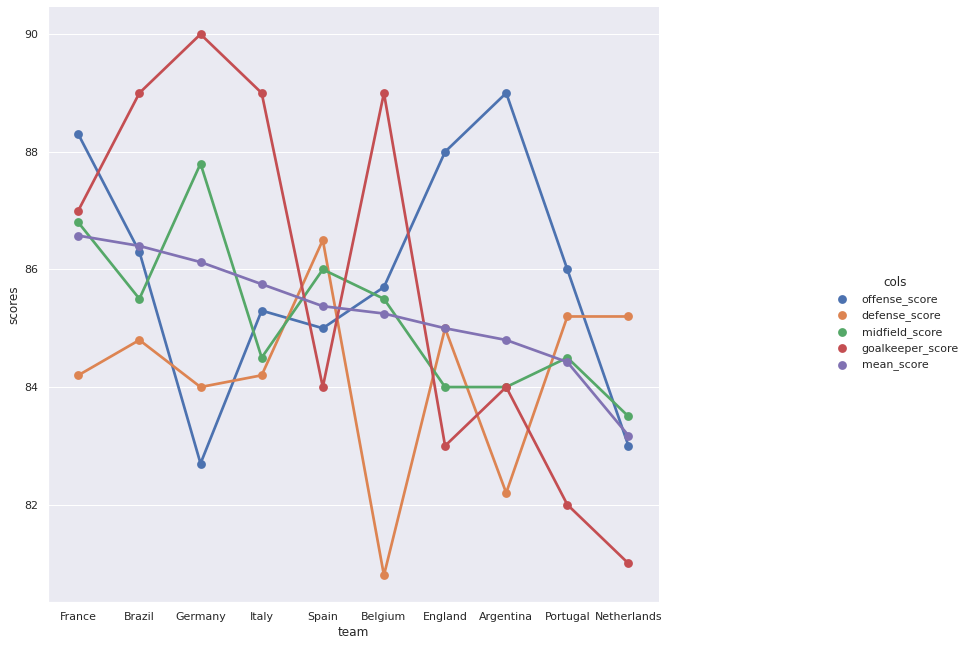

In [ ]:
all_score_dfm=all_score.sort_values(['mean_score'],ascending=False).head(10)
#win_percentage_dfm = win_percentage_dfm.drop(['win_percentage'],axis=1)
# convert to long (tidy) form
all_score_dfm = all_score_dfm.melt('team', var_name='cols', value_name='scores')
display(all_score_dfm.head())

sns.set_theme()
g = sns.catplot(x="team", y="scores", hue='cols', data=all_score_dfm, kind='point')

# When plot object already exist
fig = plt.gcf()
fig.set_size_inches(15, 10)

plt.show(fig)

## 15. Top teams with highest win percentage

           Team  Total matches  Total Win  Home win  Away win  win_percentage
4        Brazil            433        301       181       120           69.52
27        Spain            354        246       145       101           69.49
17       France            370        230       145        85           62.16
10      Germany            390        240       139       101           61.54
20      IR Iran            366        217       133        84           59.29
34  Netherlands            340        201       119        82           59.12
39     Portugal            336        198       123        75           58.93
18    Argentina            367        216       130        86           58.86
41      England            334        196       124        72           58.68
29        Italy            351        194       119        75           55.27


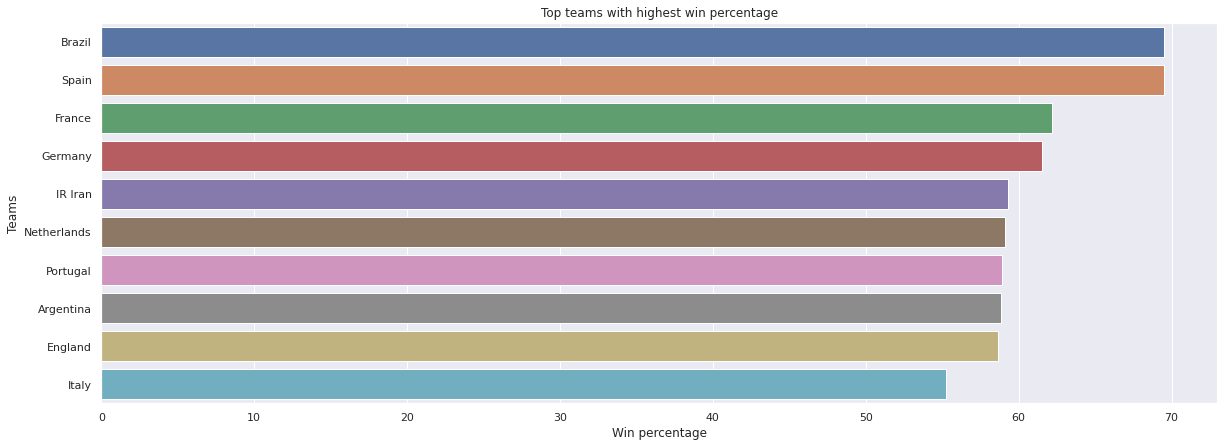

In [ ]:
teams = Total_Team_Matches.name.tolist()

hwins, hdraws, hloses = [], [], []
awins, adraws, aloses = [], [], []

for team in teams:
    home_win = data[data['home_team']==team][data['home_team_result']=='Win'].shape[0]
    home_draw = data[data['home_team']==team][data['home_team_result']=='Draw'].shape[0]
    home_lose = data[data['home_team']==team][data['home_team_result']=='Lose'].shape[0]
    
    away_win = data[data['away_team']==team][data['home_team_result']=='Lose'].shape[0]
    away_draw = data[data['away_team']==team][data['home_team_result']=='Draw'].shape[0]
    away_lose = data[data['away_team']==team][data['home_team_result']=='Win'].shape[0]  
    
    hwins.append(home_win)
    hdraws.append(home_draw)
    hloses.append(home_lose)
    
    awins.append(away_win)
    adraws.append(away_draw)
    aloses.append(away_lose)
    
    wins = np.add(hwins,awins)
    draws = np.add(hdraws,adraws)
    loses = np.add(hloses,aloses)
    total = wins+draws+loses
win_percentage_df = pd.DataFrame({'Team':teams,'Total matches':total, 'Total Win': wins,
                              'Home win': hwins,'Away win': awins})

win_percentage_df['win_percentage'] = np.around(100*win_percentage_df['Total Win']/win_percentage_df['Total matches'], 2)
print(win_percentage_df.sort_values(['win_percentage'],ascending=False).head(10))

# Bar plots
top_win_percentage = sns.barplot(data=win_percentage_df.sort_values(['win_percentage'],ascending=False).head(10),y='Team',x='win_percentage')
plt.xlabel("Win percentage")
plt.ylabel("Teams")
plt.title("Top teams with highest win percentage")

# When plot object already exist
fig = plt.gcf()
fig.set_size_inches(20, 7)

plt.show(fig)

Team           cols  matches
0   Brazil  Total matches    433.0
1    Spain  Total matches    354.0
2   France  Total matches    370.0
3  Germany  Total matches    390.0
4  IR Iran  Total matches    366.0

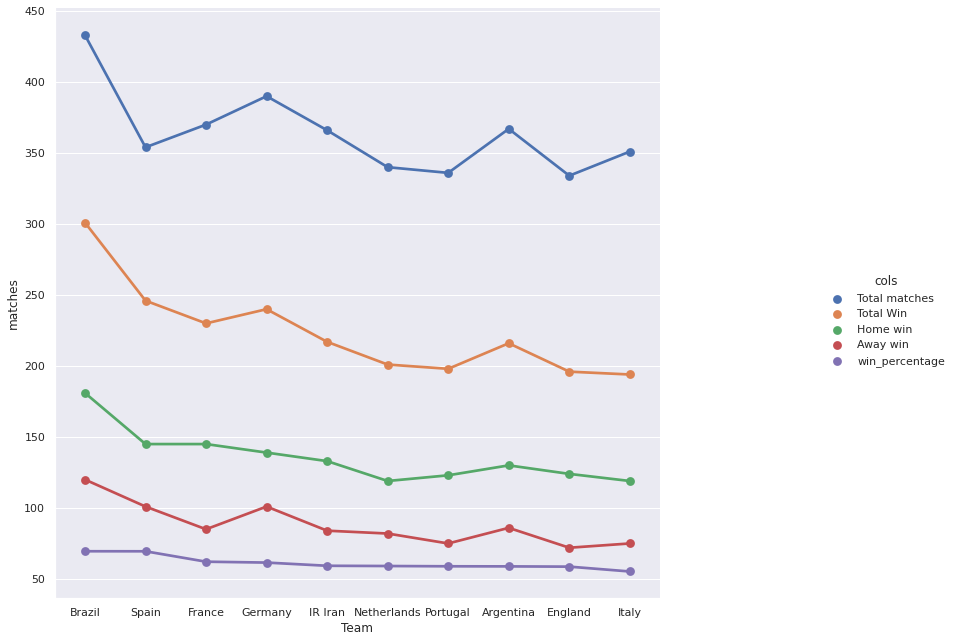

In [ ]:
win_percentage_dfm=win_percentage_df.sort_values(['win_percentage'],ascending=False).head(10)
#win_percentage_dfm = win_percentage_dfm.drop(['win_percentage'],axis=1)
# convert to long (tidy) form
dfm = win_percentage_dfm.melt('Team', var_name='cols', value_name='matches')
display(dfm.head())

sns.set_theme()
g = sns.catplot(x="Team", y="matches", hue='cols', data=dfm, kind='point')

# When plot object already exist
fig = plt.gcf()
fig.set_size_inches(15, 10)

plt.show(fig)

## 16. Top teams with highest Goal Difference

           team  Total Goals Scored  Total Goals Conceded  goal_difference
4        Brazil                 954                   300              654
27        Spain                 781                   248              533
10      Germany                 875                   391              484
20      IR Iran                 713                   280              433
34  Netherlands                 700                   287              413
17       France                 670                   266              404
39     Portugal                 668                   268              400
41      England                 630                   251              379
5         Japan                 776                   426              350
0        Mexico                 858                   519              339


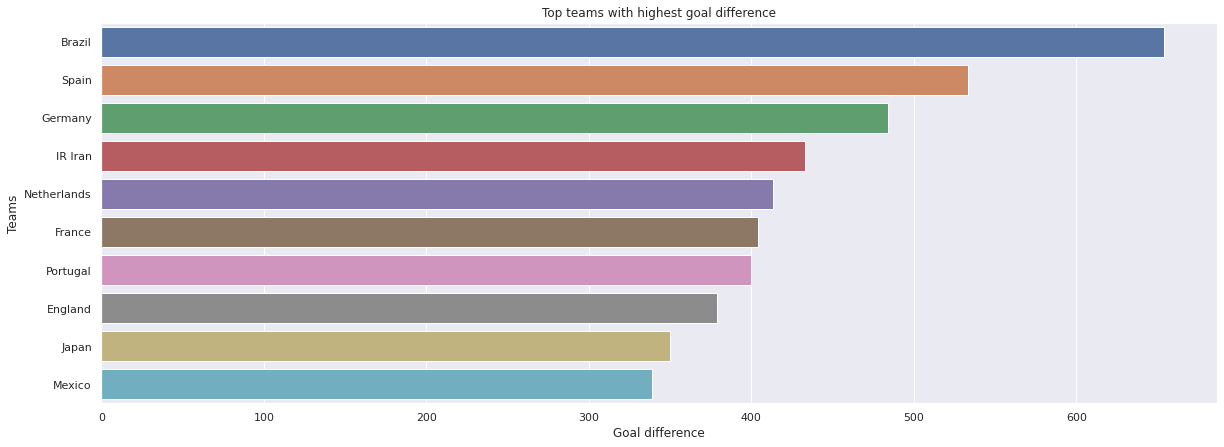

In [ ]:
teams = Total_Team_Matches.name.tolist()

hscored, hconceded = [], []
ascored, aconceded = [], []

for team in teams:
    home_scored = data[data['home_team']==team]['home_team_score'].sum()
    home_conceded = data[data['home_team']==team]['away_team_score'].sum()
    away_scored = data[data['away_team']==team]['away_team_score'].sum()
    away_conceded = data[data['away_team']==team]['home_team_score'].sum()
    
    hscored.append(home_scored)
    hconceded.append(home_conceded)
    ascored.append(away_scored)
    aconceded.append(away_conceded)
    
    total_goal_scored = np.add(hscored,ascored)
    total_goal_conceded = np.add(hconceded,aconceded)
    
goal_difference_df = pd.DataFrame({'team':teams,'Total Goals Scored':total_goal_scored, 'Total Goals Conceded': total_goal_conceded})

goal_difference_df['goal_difference'] = goal_difference_df['Total Goals Scored'] - goal_difference_df['Total Goals Conceded']
print(goal_difference_df.sort_values(['goal_difference'],ascending=False).head(10))

# Bar plots
sns.barplot(data=goal_difference_df.sort_values(['goal_difference'],ascending=False).head(10),y='team',x='goal_difference')
plt.xlabel("Goal difference")
plt.ylabel("Teams")
plt.title("Top teams with highest goal difference")

# When plot object already exist
fig = plt.gcf()
fig.set_size_inches(20, 7)

plt.show(fig)

team                cols  goals
0       Brazil  Total Goals Scored    954
1        Spain  Total Goals Scored    781
2      Germany  Total Goals Scored    875
3      IR Iran  Total Goals Scored    713
4  Netherlands  Total Goals Scored    700

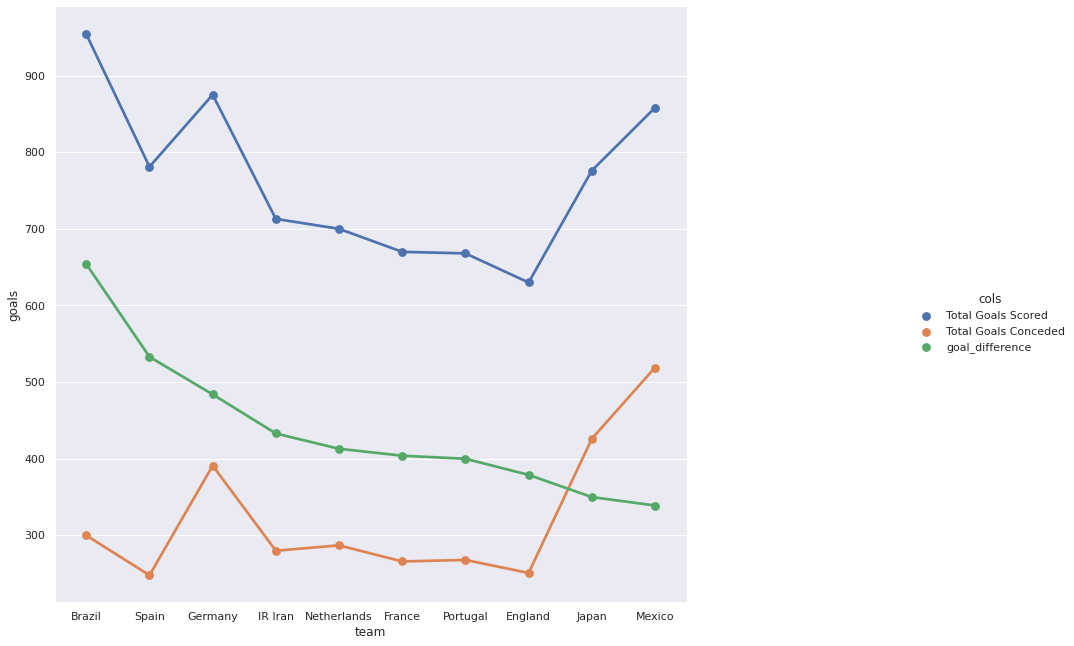

In [ ]:
goal_difference_dfm=goal_difference_df.sort_values(['goal_difference'],ascending=False).head(10)
#win_percentage_dfm = win_percentage_dfm.drop(['win_percentage'],axis=1)
# convert to long (tidy) form
gd_dfm = goal_difference_dfm.melt('team', var_name='cols', value_name='goals')
display(gd_dfm.head())

sns.set_theme()
g = sns.catplot(x="team", y="goals", hue='cols', data=gd_dfm, kind='point')

# When plot object already exist
fig = plt.gcf()
fig.set_size_inches(17, 10)

plt.show(fig)

## 18. Scores vs Goals

In [ ]:
scores_goals = goal_difference_df.merge(all_score,on='team',how='left')
scores_goals_top = scores_goals.drop(['goal_difference'],axis=1).sort_values(['mean_score'],ascending=False).head(10)
scores_goals_top

team  Total Goals Scored  Total Goals Conceded  offense_score  \
17       France                 670                   266           88.3   
4        Brazil                 954                   300           86.3   
10      Germany                 875                   391           82.7   
29        Italy                 558                   283           85.3   
27        Spain                 781                   248           85.0   
67      Belgium                 563                   329           85.7   
41      England                 630                   251           88.0   
18    Argentina                 657                   332           89.0   
39     Portugal                 668                   268           86.0   
34  Netherlands                 700                   287           83.0   

    defense_score  midfield_score  goalkeeper_score  mean_score  
17           84.2            86.8              87.0      86.575  
4            84.8            85.5              89.0      86.400  
10           84.0            87.8              90.0      86.125  
29           84.2            84.5              89.0      85.750  
27           86.5            86.0              84.0      85.375  
67           80.8            85.5              89.0      85.250  
41           85.0            84.0              83.0      85.000  
18           82.2            84.0              84.0      84.800  
39           85.2            84.5              82.0      84.425  
34           85.2            83.5              81.0      83.175

#Live Tracking and Simulations

## Round of 16

### FIFA Ranking

In [ ]:
home = data[['date', 'home_team','home_team_fifa_rank']].rename(columns = {'home_team': 'team', 'home_team_fifa_rank' : 'rank'})
away = data[['date', 'away_team','away_team_fifa_rank']].rename(columns = {'away_team': 'team', 'away_team_fifa_rank' : 'rank'})
fifa_rank = home.append(away)
fifa_rank

date      team  rank
0     1993-08-08   Bolivia    59
1     1993-08-08    Brazil     8
2     1993-08-08   Ecuador    35
3     1993-08-08    Guinea    65
4     1993-08-08  Paraguay    67
...          ...       ...   ...
23916 2022-06-14   Andorra   153
23917 2022-06-14    Latvia   135
23918 2022-06-14     Ghana    60
23919 2022-06-14   Tunisia    35
23920 2022-06-14     Egypt    32

[47842 rows x 3 columns]

###  1. Netherlands v/s USA

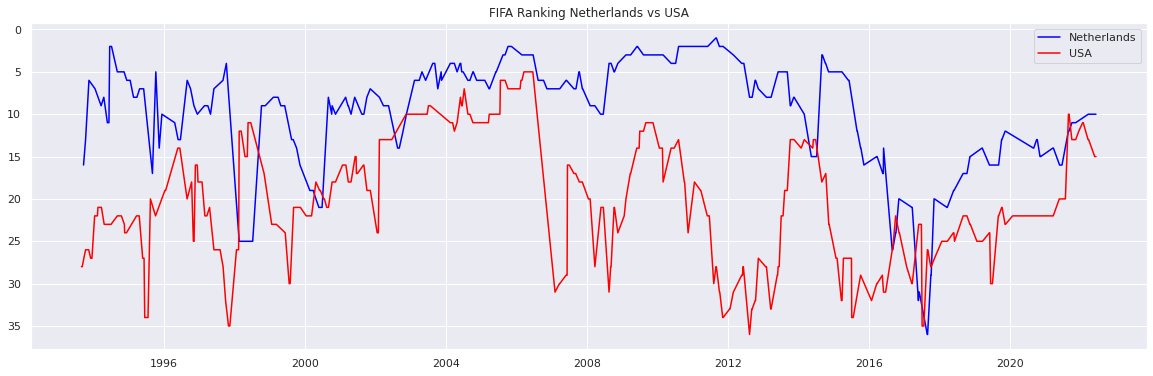

In [ ]:
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
netherlands = fifa_rank[fifa_rank['team']=='Netherlands']
usa = fifa_rank[fifa_rank['team']=='USA']
ax = sns.lineplot(data = netherlands, x = 'date', y = 'rank', label = 'Netherlands', color = "blue")
ax = sns.lineplot(data = usa, x = 'date', y = 'rank', label = 'USA', color = 'red' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking Netherlands vs USA')
plt.show()

###  2. Argentina v/s Australia

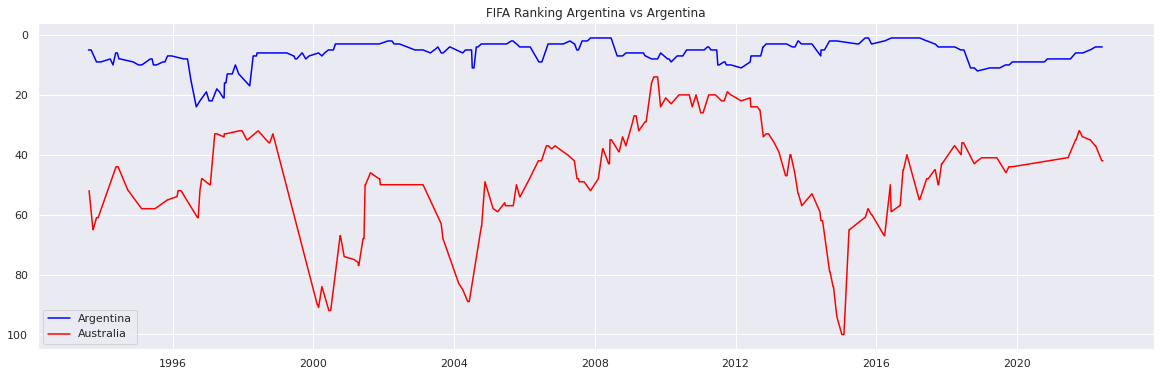

In [ ]:
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
argentina = fifa_rank[fifa_rank['team']=='Argentina']
australia = fifa_rank[fifa_rank['team']=='Australia']
ax = sns.lineplot(data = argentina, x = 'date', y = 'rank', label = 'Argentina', color = "blue")
ax = sns.lineplot(data = australia, x = 'date', y = 'rank', label = 'Australia', color = 'red' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking Argentina vs Argentina')
plt.show()

### 3.Japan v/s Croatia

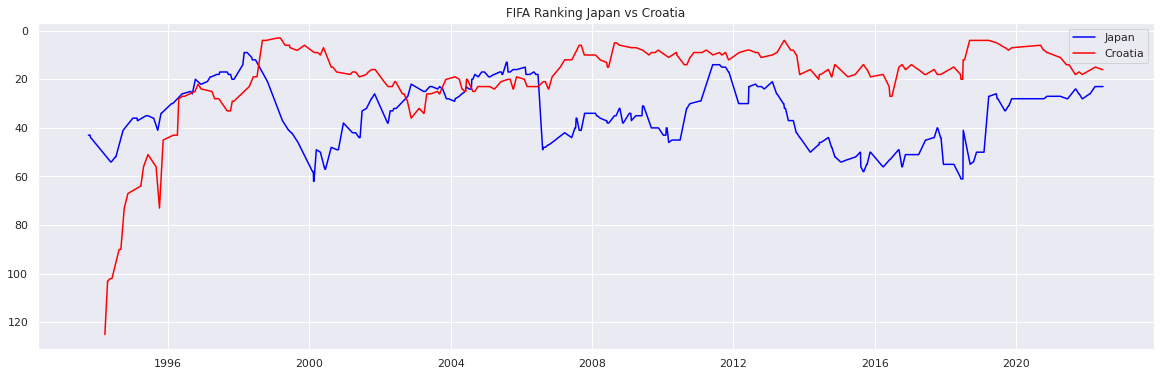

In [ ]:
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
japan = fifa_rank[fifa_rank['team']=='Japan']
croatia = fifa_rank[fifa_rank['team']=='Croatia']
ax = sns.lineplot(data = japan, x = 'date', y = 'rank', label = 'Japan', color = "blue")
ax = sns.lineplot(data = croatia, x = 'date', y = 'rank', label = 'Croatia', color = 'red' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking Japan vs Croatia')
plt.show()

### 4.Brazil v/s South Korea

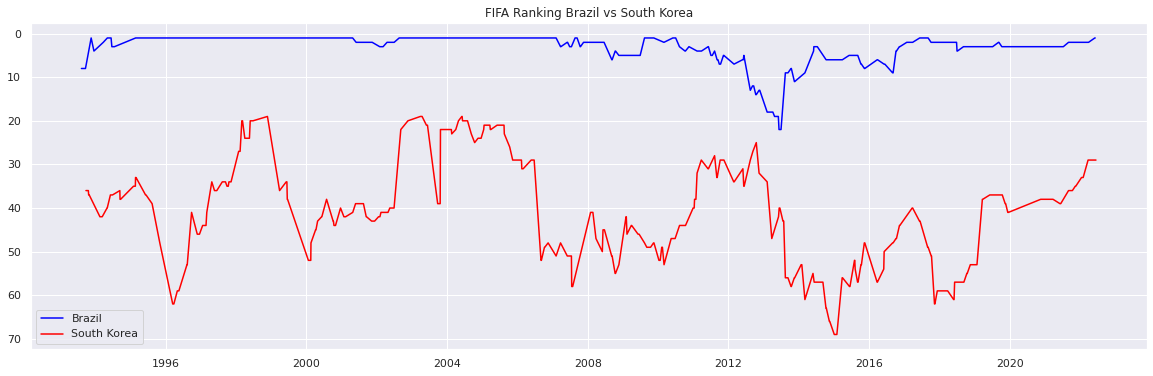

In [ ]:
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
brazil = fifa_rank[fifa_rank['team']=='Brazil']
korea = fifa_rank[fifa_rank['team']=='Korea Republic']
ax = sns.lineplot(data = brazil, x = 'date', y = 'rank', label = 'Brazil', color = "blue")
ax = sns.lineplot(data = korea, x = 'date', y = 'rank', label = 'South Korea', color = 'red' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking Brazil vs South Korea')
plt.show()

### 5.France v/s Poland

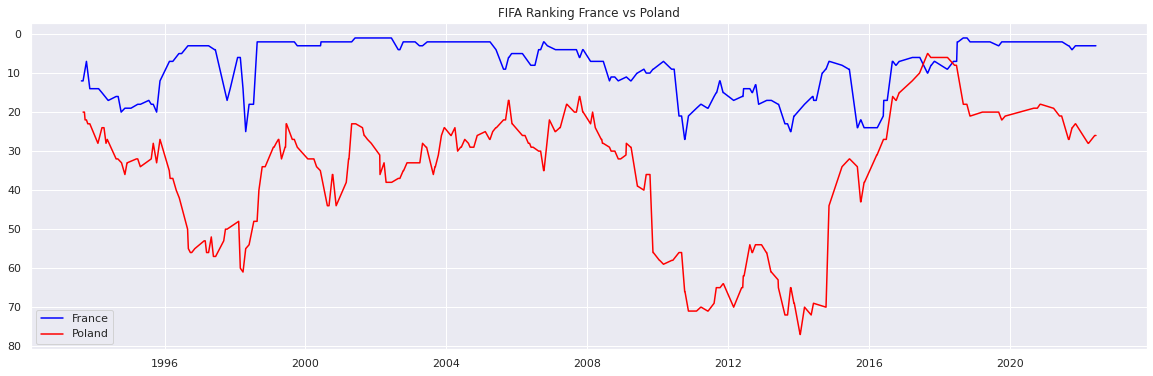

In [ ]:
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
france = fifa_rank[fifa_rank['team']=='France']
poland = fifa_rank[fifa_rank['team']=='Poland']
ax = sns.lineplot(data = france, x = 'date', y = 'rank', label = 'France', color = "blue")
ax = sns.lineplot(data = poland, x = 'date', y = 'rank', label = 'Poland', color = 'red' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking France vs Poland')
plt.show()

### 6.England v/s Senegal

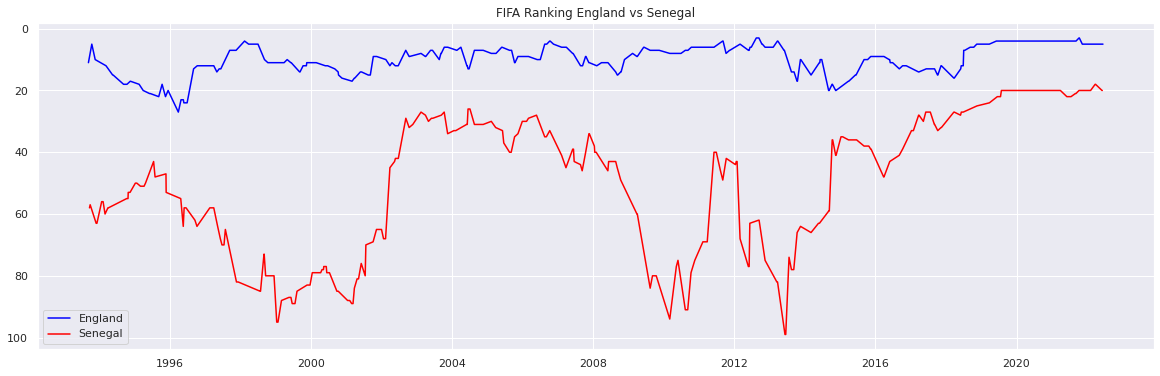

In [ ]:
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
england = fifa_rank[fifa_rank['team']=='England']
senegal = fifa_rank[fifa_rank['team']=='Senegal']
ax = sns.lineplot(data = england, x = 'date', y = 'rank', label = 'England', color = "blue")
ax = sns.lineplot(data = senegal, x = 'date', y = 'rank', label = 'Senegal', color = 'red' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking England vs Senegal')
plt.show()

### 7. Morocco v/s Spain

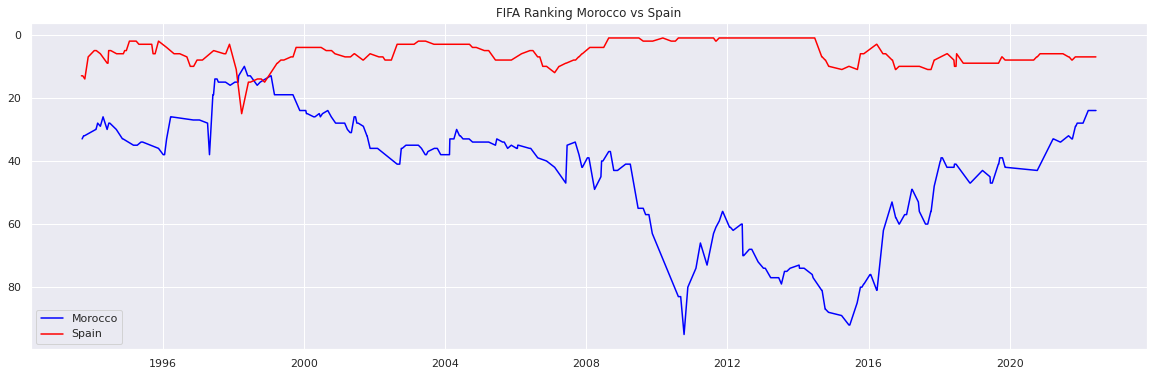

In [ ]:
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
morocco = fifa_rank[fifa_rank['team']=='Morocco']
spain = fifa_rank[fifa_rank['team']=='Spain']
ax = sns.lineplot(data = morocco, x = 'date', y = 'rank', label = 'Morocco', color = "blue")
ax = sns.lineplot(data = spain, x = 'date', y = 'rank', label = 'Spain', color = 'red' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking Morocco vs Spain')
plt.show()

### 8. Portugal v/s Switzerland

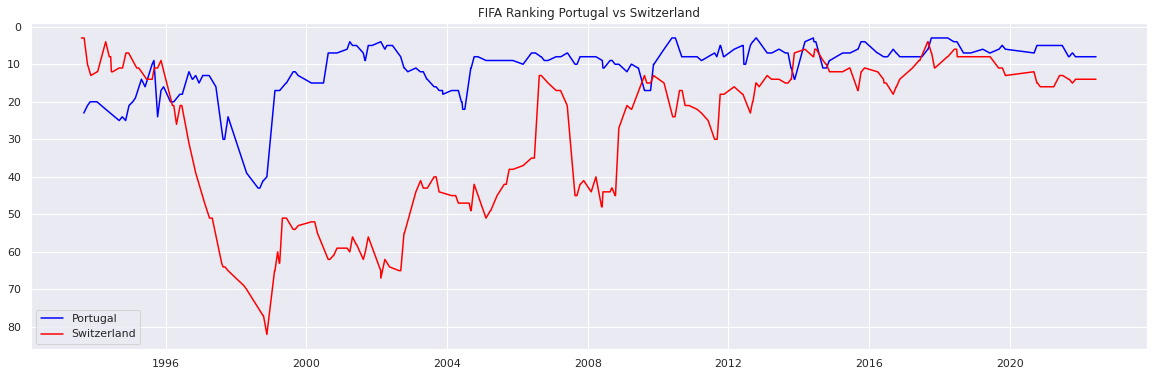

In [ ]:
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
portugal = fifa_rank[fifa_rank['team']=='Portugal']
switzerland = fifa_rank[fifa_rank['team']=='Switzerland']
ax = sns.lineplot(data = portugal, x = 'date', y = 'rank', label = 'Portugal', color = "blue")
ax = sns.lineplot(data = switzerland, x = 'date', y = 'rank', label = 'Switzerland', color = 'red' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking Portugal vs Switzerland')
plt.show()

## Quarter Finals

### 1. Croatia v/s Brazil

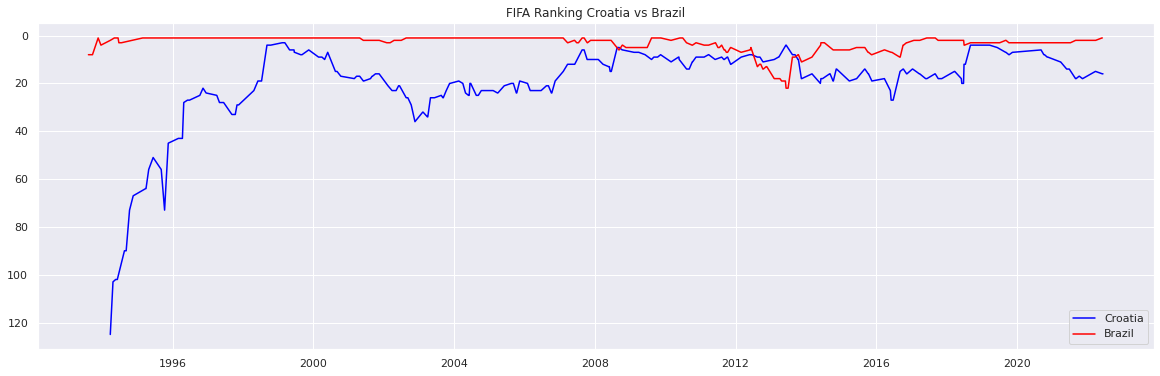

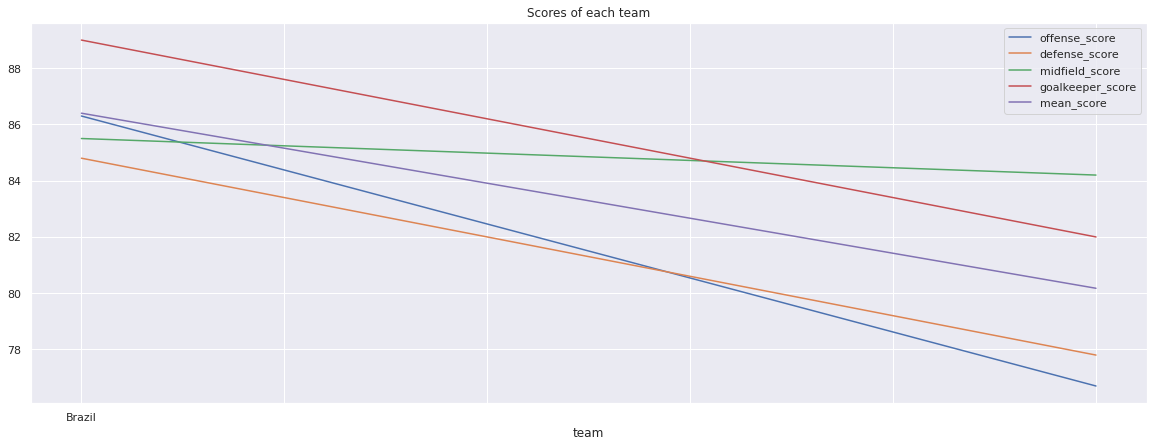

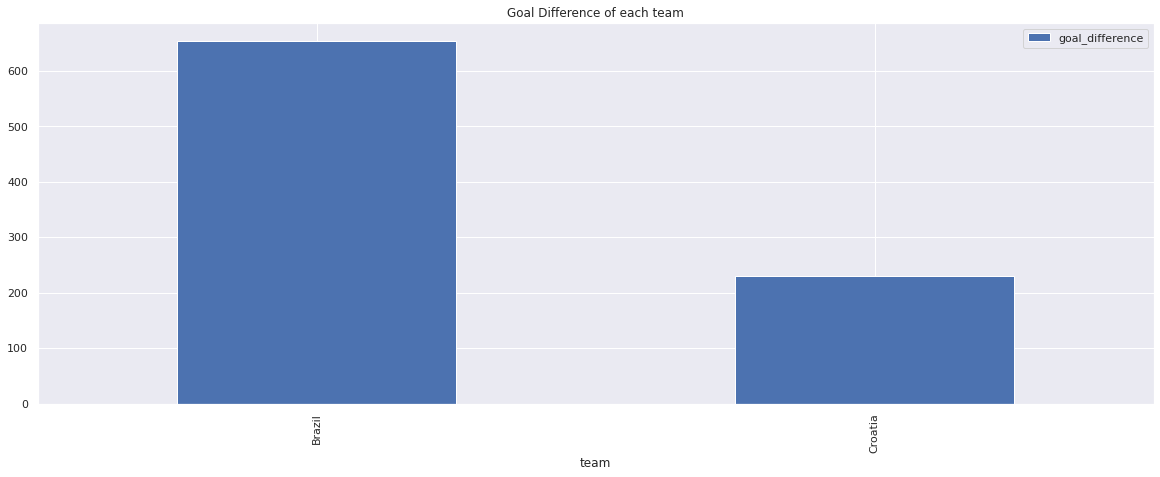

In [ ]:
#FIFA Ranking
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
croatia = fifa_rank[fifa_rank['team']=='Croatia']
brazil = fifa_rank[fifa_rank['team']=='Brazil']
ax = sns.lineplot(data = croatia, x = 'date', y = 'rank', label = 'Croatia', color = "blue")
ax = sns.lineplot(data = brazil, x = 'date', y = 'rank', label = 'Brazil', color = 'red' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking Croatia vs Brazil')
plt.show()

#Matches Played
qf_m1_team = ('Croatia','Brazil')
qf_m1 = pd.DataFrame(data[data['home_team'].isin(qf_m1_team)])
qf_m1 = pd.DataFrame(qf_m1[qf_m1['away_team'].isin(qf_m1_team)])

#Scores
qf_m1_sg = scores_goals.loc[(scores_goals['team'] == 'Brazil') | (scores_goals['team'] == 'Croatia')]
qf_m1_sg = qf_m1_sg.merge(team_ranks, on='team', how='left')
qf_m1_sg_score = qf_m1_sg.drop(['Total Goals Scored','Total Goals Conceded','goal_difference','Rank'],axis=1)

# plotting graph
qf_m1_sg.plot(x="team", y=["offense_score", "defense_score",'midfield_score','goalkeeper_score','mean_score'])
plt.title("Scores of each team")
fig = plt.gcf()
fig.set_size_inches(20, 7)
qf_m1_sg.plot(x="team", y="goal_difference", kind="bar")
plt.title("Goal Difference of each team")
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

### 2. Netherlands v/s Argentina

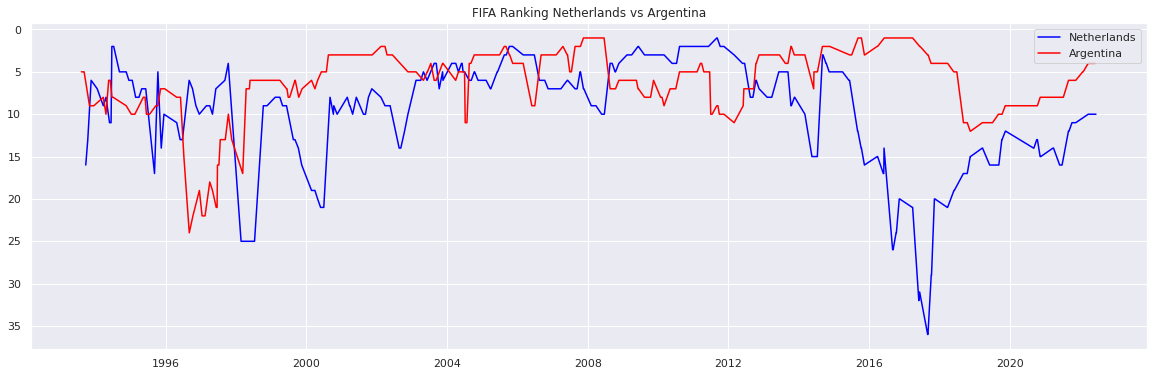

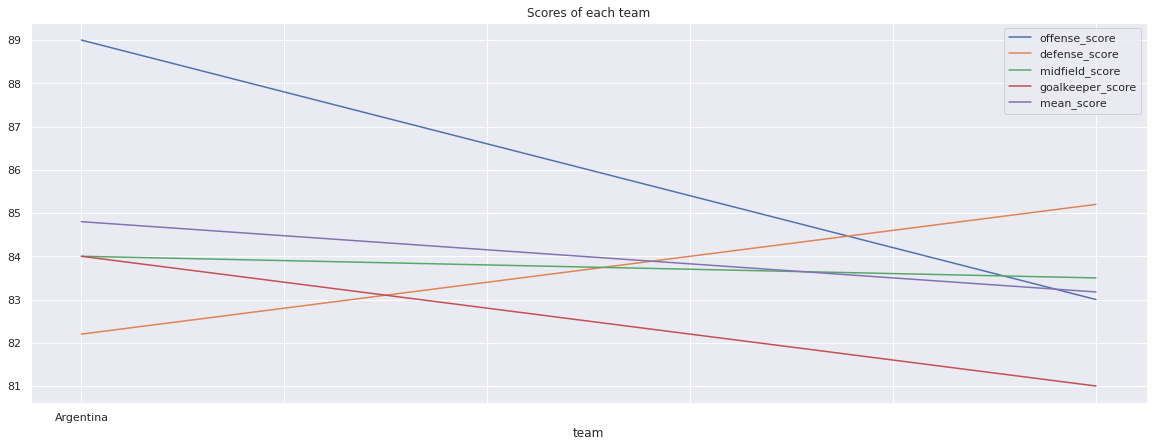

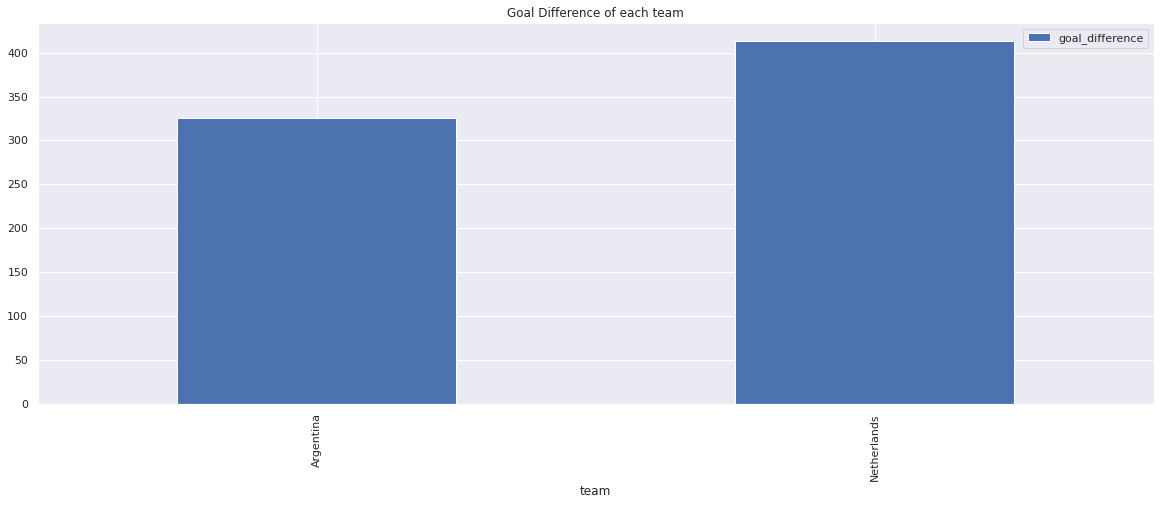

In [ ]:
#FIFA Ranking
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
netherlands = fifa_rank[fifa_rank['team']=='Netherlands']
argentina = fifa_rank[fifa_rank['team']=='Argentina']
ax = sns.lineplot(data = netherlands, x = 'date', y = 'rank', label = 'Netherlands', color = "blue")
ax = sns.lineplot(data = argentina, x = 'date', y = 'rank', label = 'Argentina', color = 'red' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking Netherlands vs Argentina')
plt.show()


#Matches Played
qf_m2_team = ('Netherlands','Argentina')
qf_m2 = pd.DataFrame(data[data['home_team'].isin(qf_m2_team)])
qf_m2 = pd.DataFrame(qf_m1[qf_m1['away_team'].isin(qf_m2_team)])

#Scores
qf_m2_sg = scores_goals.loc[(scores_goals['team'] == 'Netherlands') | (scores_goals['team'] == 'Argentina')]
qf_m2_sg = qf_m2_sg.merge(team_ranks, on='team', how='left')
qf_m2_sg_score = qf_m2_sg.drop(['Total Goals Scored','Total Goals Conceded','goal_difference','Rank'],axis=1)

# plotting graph
qf_m2_sg.plot(x="team", y=["offense_score", "defense_score",'midfield_score','goalkeeper_score','mean_score'])
plt.title("Scores of each team")
fig = plt.gcf()
fig.set_size_inches(20, 7)
qf_m2_sg.plot(x="team", y="goal_difference", kind="bar")
plt.title("Goal Difference of each team")
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

### 3. Morocco v/s Portugal

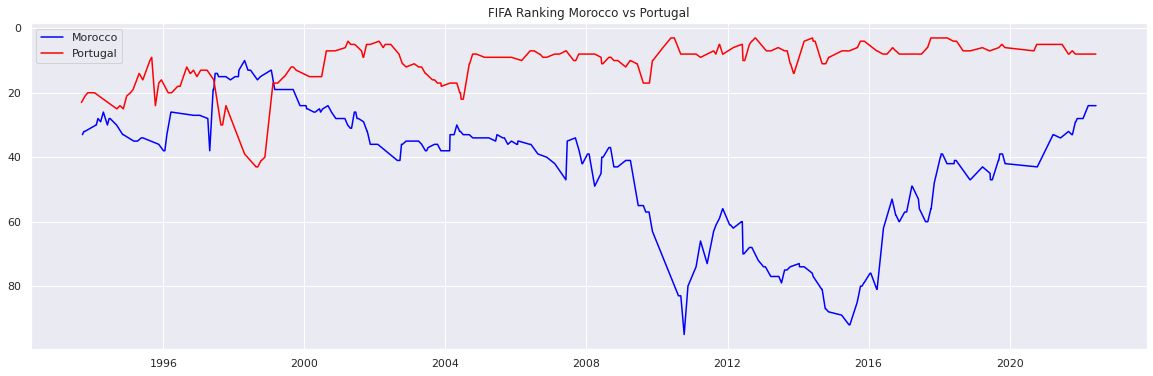

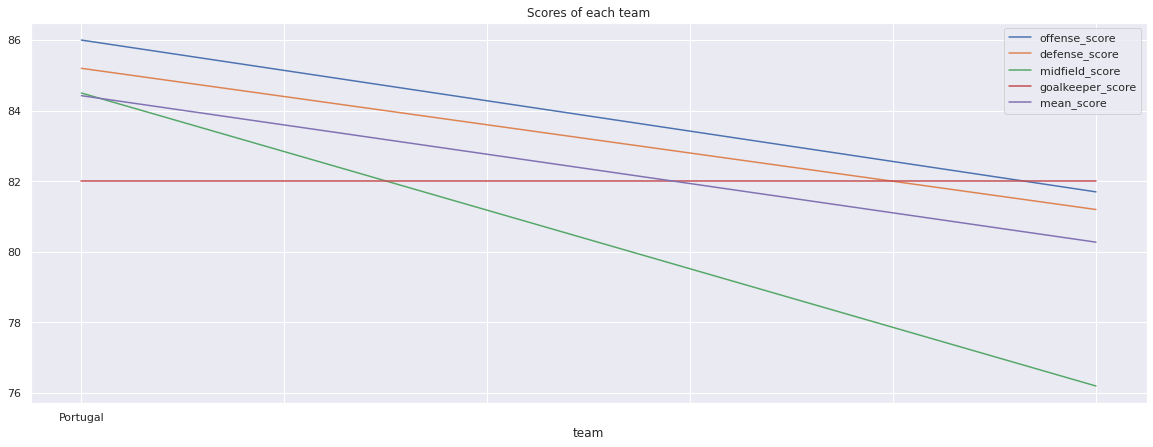

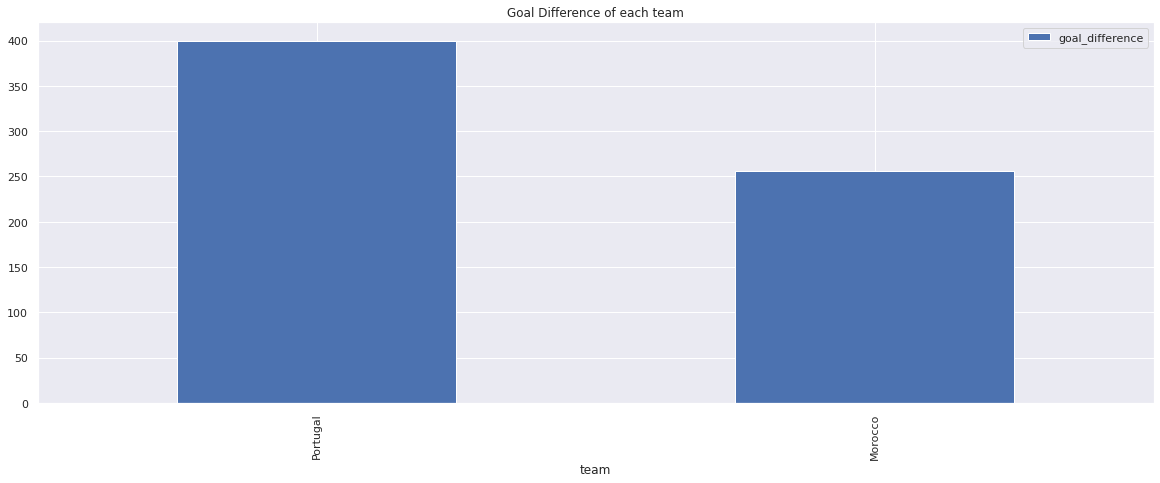

In [ ]:
#FIFA Ranking
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
morocco = fifa_rank[fifa_rank['team']=='Morocco']
portugal = fifa_rank[fifa_rank['team']=='Portugal']
ax = sns.lineplot(data = morocco, x = 'date', y = 'rank', label = 'Morocco', color = "blue")
ax = sns.lineplot(data = portugal, x = 'date', y = 'rank', label = 'Portugal', color = 'red' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking Morocco vs Portugal')
plt.show()


#Matches Played
qf_m3_team = ('Morocco','Portugal')
qf_m3 = pd.DataFrame(data[data['home_team'].isin(qf_m3_team)])
qf_m3 = pd.DataFrame(qf_m3[qf_m3['away_team'].isin(qf_m3_team)])

#Scores
qf_m3_sg = scores_goals.loc[(scores_goals['team'] == 'Morocco') | (scores_goals['team'] == 'Portugal')]
qf_m3_sg = qf_m3_sg.merge(team_ranks, on='team', how='left')
qf_m3_sg_score = qf_m3_sg.drop(['Total Goals Scored','Total Goals Conceded','goal_difference','Rank'],axis=1)

# plotting graph
qf_m3_sg.plot(x="team", y=["offense_score", "defense_score",'midfield_score','goalkeeper_score','mean_score'])
plt.title("Scores of each team")
fig = plt.gcf()
fig.set_size_inches(20, 7)
qf_m3_sg.plot(x="team", y="goal_difference", kind="bar")
plt.title("Goal Difference of each team")
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

### 4. England v/s France

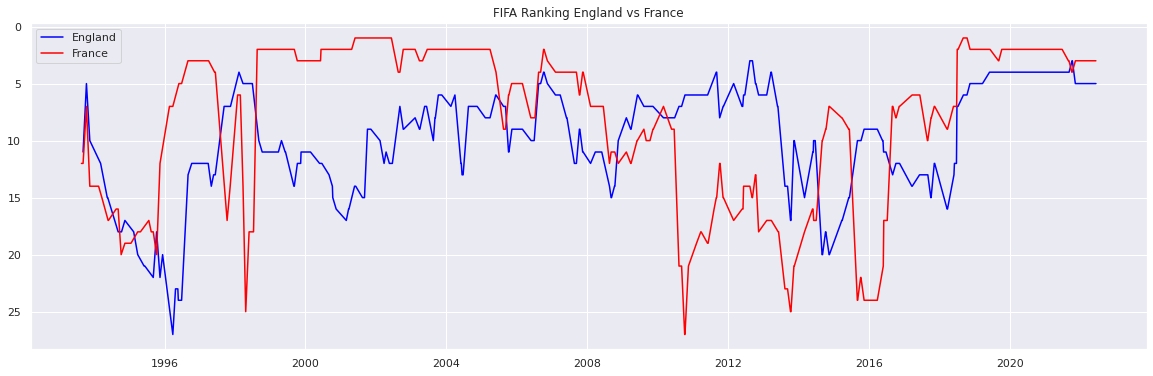

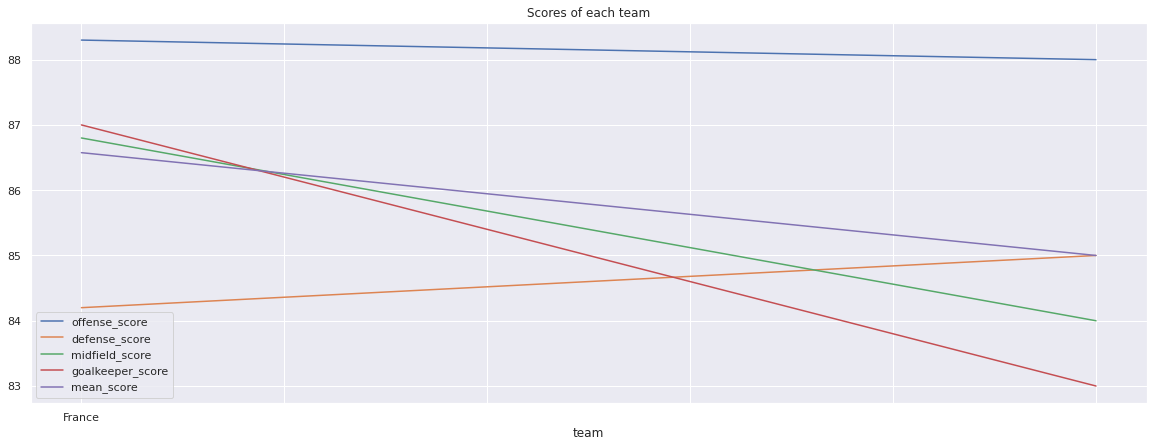

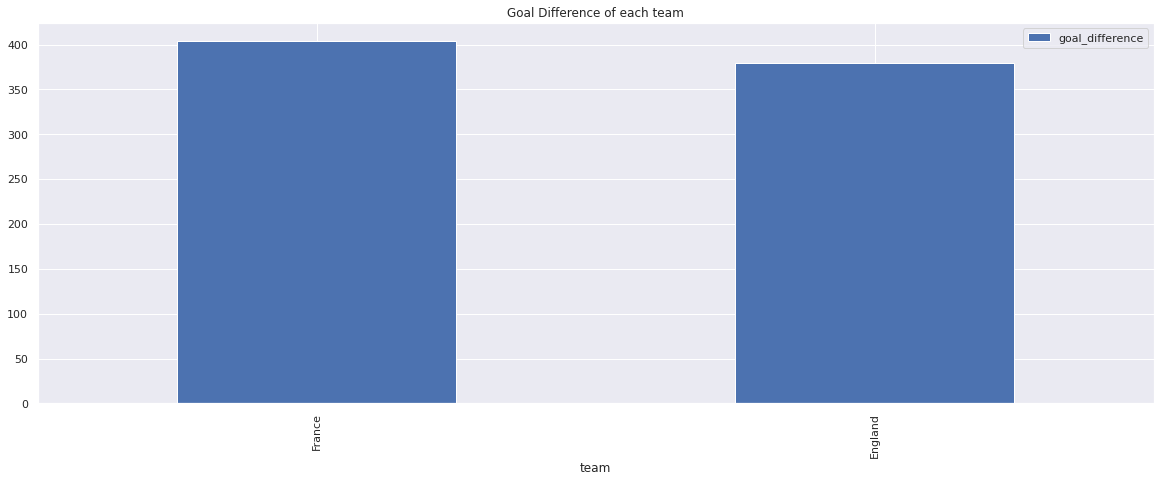

In [ ]:
#FIFA Ranking
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
england = fifa_rank[fifa_rank['team']=='England']
france = fifa_rank[fifa_rank['team']=='France']
ax = sns.lineplot(data = england, x = 'date', y = 'rank', label = 'England', color = "blue")
ax = sns.lineplot(data = france, x = 'date', y = 'rank', label = 'France', color = 'red' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking England vs France')
plt.show()


#Matches Played
qf_m4_team = ('England','France')
qf_m4 = pd.DataFrame(data[data['home_team'].isin(qf_m4_team)])
qf_m4 = pd.DataFrame(qf_m4[qf_m4['away_team'].isin(qf_m4_team)])

#Scores
qf_m4_sg = scores_goals.loc[(scores_goals['team'] == 'England') | (scores_goals['team'] == 'France')]
qf_m4_sg = qf_m4_sg.merge(team_ranks, on='team', how='left')
qf_m4_sg_score = qf_m4_sg.drop(['Total Goals Scored','Total Goals Conceded','goal_difference','Rank'],axis=1)

# plotting graph
qf_m4_sg.plot(x="team", y=["offense_score", "defense_score",'midfield_score','goalkeeper_score','mean_score'])
plt.title("Scores of each team")
fig = plt.gcf()
fig.set_size_inches(20, 7)
qf_m4_sg.plot(x="team", y="goal_difference", kind="bar")
plt.title("Goal Difference of each team")
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

## Semi Finals

### 1. Argentina vs Croatia

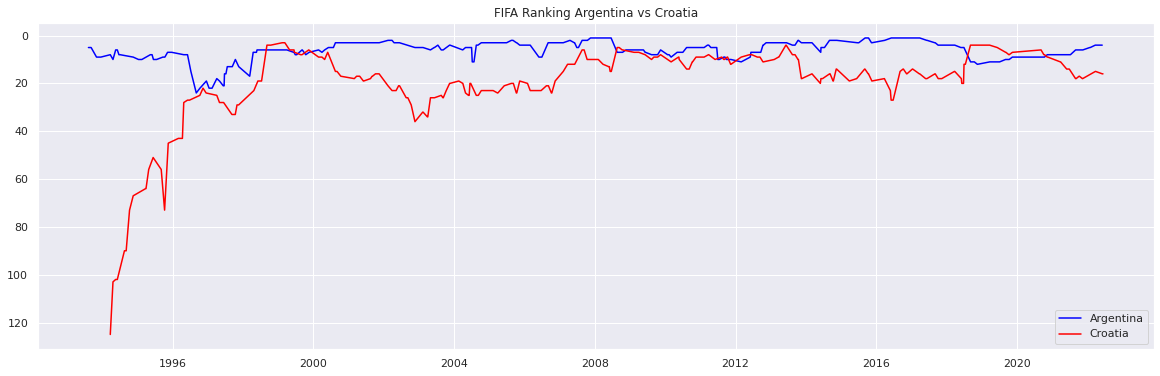

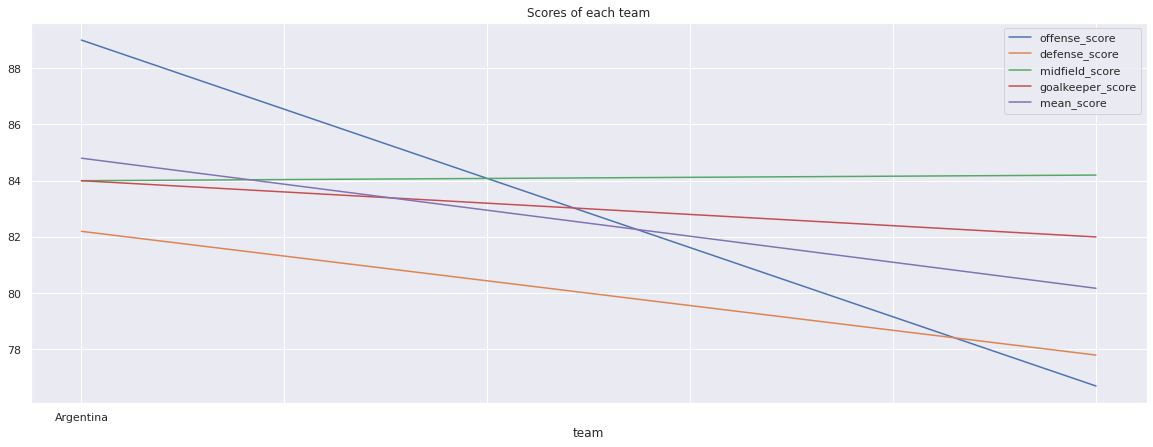

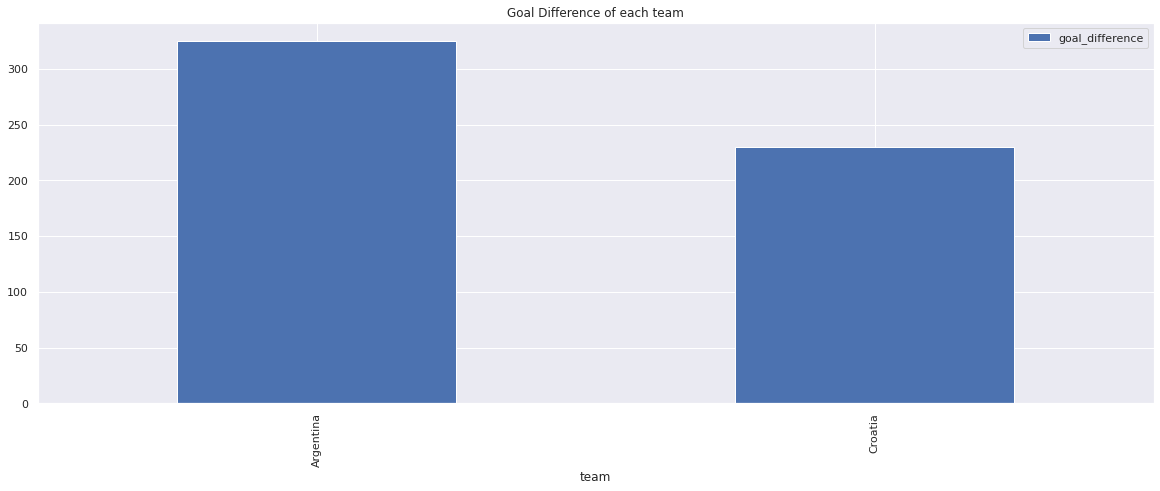

In [ ]:
#FIFA Ranking
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
argentina = fifa_rank[fifa_rank['team']=='Argentina']
croatia = fifa_rank[fifa_rank['team']=='Croatia']
ax = sns.lineplot(data = argentina, x = 'date', y = 'rank', label = 'Argentina', color = "blue")
ax = sns.lineplot(data = croatia, x = 'date', y = 'rank', label = 'Croatia', color = 'red' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking Argentina vs Croatia')
plt.show()


#Matches Played
sf_m1_team = ('Argentina','Croatia')
sf_m1 = pd.DataFrame(data[data['home_team'].isin(sf_m1_team)])
sf_m1 = pd.DataFrame(sf_m1[sf_m1['away_team'].isin(sf_m1_team)])

#Scores
sf_m1_sg = scores_goals.loc[(scores_goals['team'] == 'Argentina') | (scores_goals['team'] == 'Croatia')]
sf_m1_sg = sf_m1_sg.merge(team_ranks, on='team', how='left')
sf_m1_sg_score = sf_m1_sg.drop(['Total Goals Scored','Total Goals Conceded','goal_difference','Rank'],axis=1)

# plotting graph
sf_m1_sg.plot(x="team", y=["offense_score", "defense_score",'midfield_score','goalkeeper_score','mean_score'])
plt.title("Scores of each team")
fig = plt.gcf()
fig.set_size_inches(20, 7)
sf_m1_sg.plot(x="team", y="goal_difference", kind="bar")
plt.title("Goal Difference of each team")
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

### 2. France vs Morocco

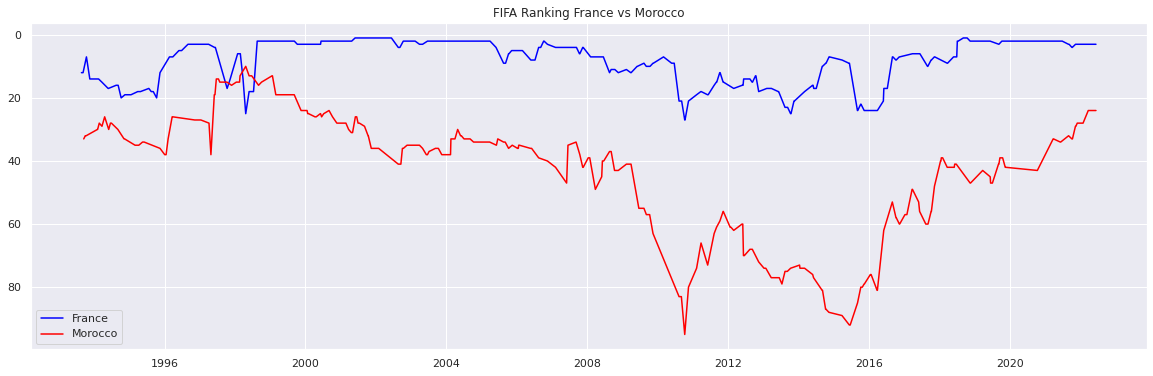

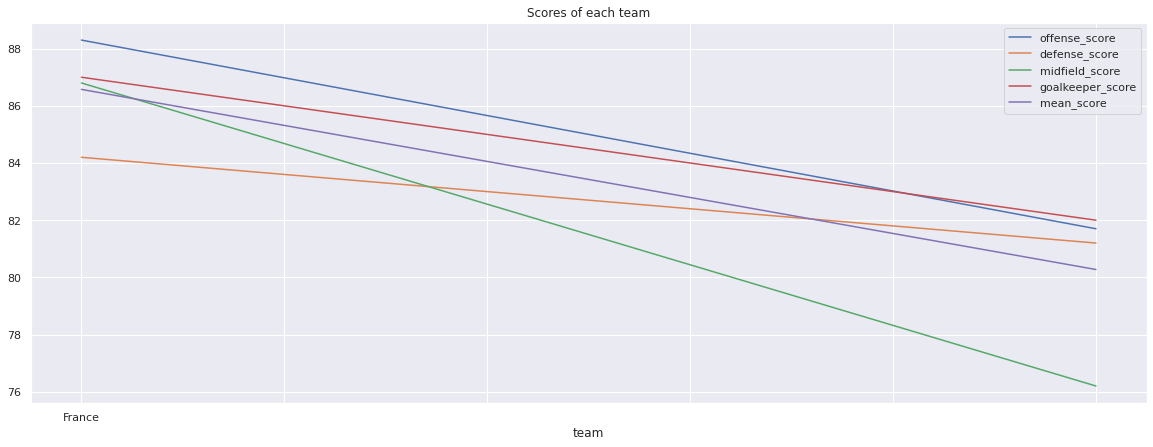

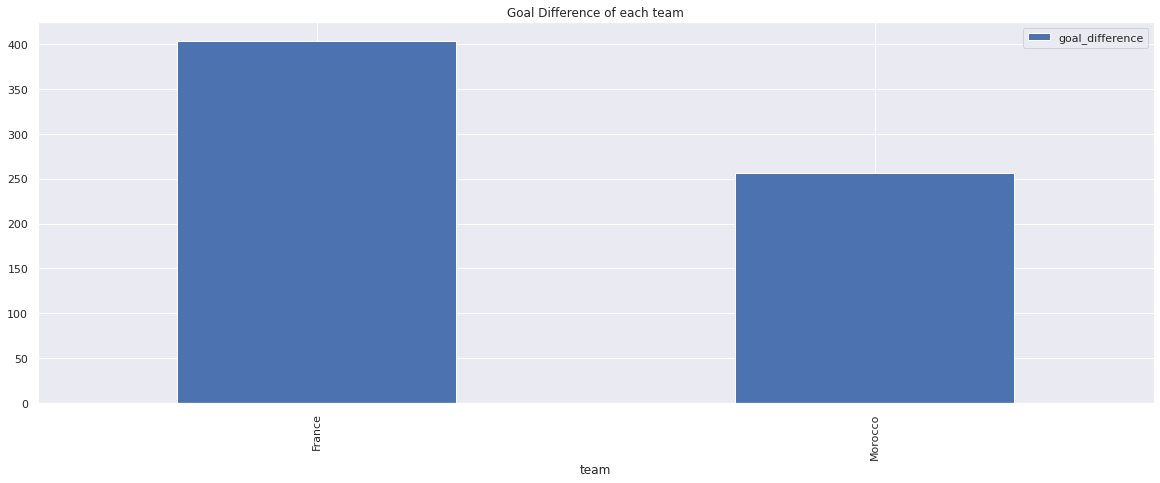

In [ ]:
#FIFA Ranking
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
france = fifa_rank[fifa_rank['team']=='France']
morocco = fifa_rank[fifa_rank['team']=='Morocco']
ax = sns.lineplot(data = france, x = 'date', y = 'rank', label = 'France', color = "blue")
ax = sns.lineplot(data = morocco, x = 'date', y = 'rank', label = 'Morocco', color = 'red' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking France vs Morocco')
plt.show()


#Matches Played
sf_m1_team = ('France','Morocco')
sf_m1 = pd.DataFrame(data[data['home_team'].isin(sf_m1_team)])
sf_m1 = pd.DataFrame(sf_m1[sf_m1['away_team'].isin(sf_m1_team)])

#Scores
sf_m1_sg = scores_goals.loc[(scores_goals['team'] == 'France') | (scores_goals['team'] == 'Morocco')]
sf_m1_sg = sf_m1_sg.merge(team_ranks, on='team', how='left')
sf_m1_sg_score = sf_m1_sg.drop(['Total Goals Scored','Total Goals Conceded','goal_difference','Rank'],axis=1)

# plotting graph
sf_m1_sg.plot(x="team", y=["offense_score", "defense_score",'midfield_score','goalkeeper_score','mean_score'])
plt.title("Scores of each team")
fig = plt.gcf()
fig.set_size_inches(20, 7)
sf_m1_sg.plot(x="team", y="goal_difference", kind="bar")
plt.title("Goal Difference of each team")
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

## Third Position Play off

### Croatia vs Morocco

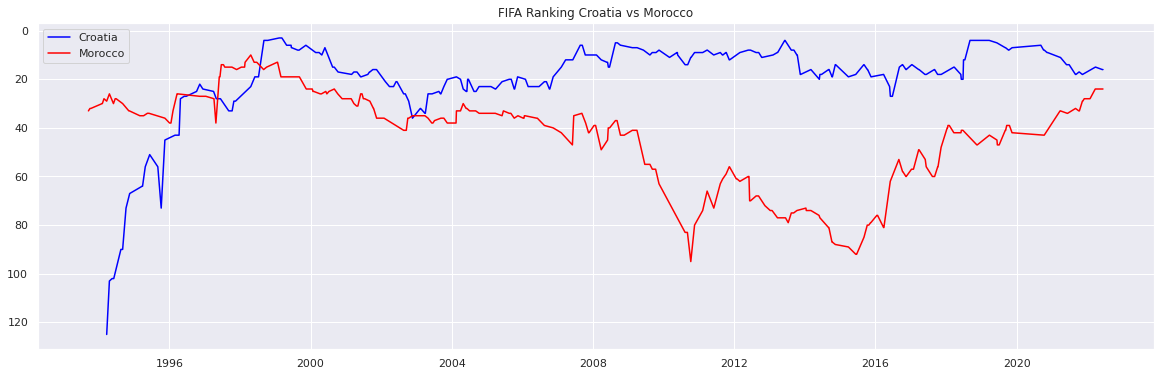

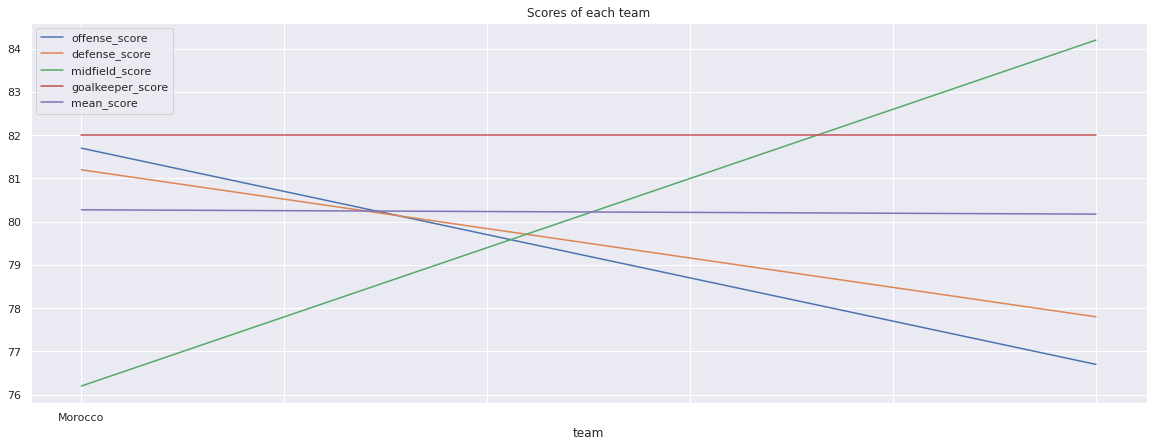

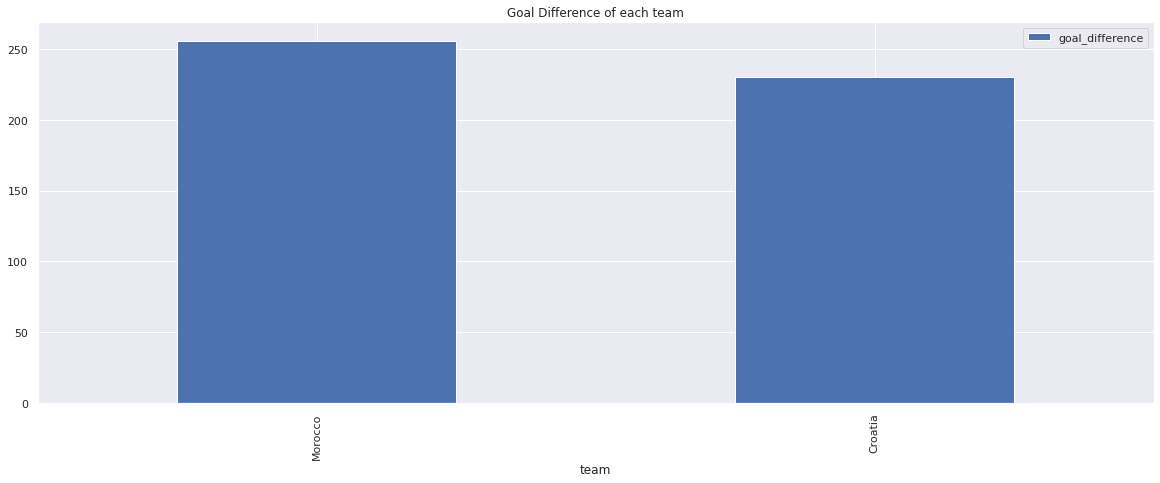

In [ ]:
#FIFA Ranking
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
croatia = fifa_rank[fifa_rank['team']=='Croatia']
morocco = fifa_rank[fifa_rank['team']=='Morocco']
ax = sns.lineplot(data = croatia, x = 'date', y = 'rank', label = 'Croatia', color = "blue")
ax = sns.lineplot(data = morocco, x = 'date', y = 'rank', label = 'Morocco', color = 'red' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking Croatia vs Morocco')
plt.show()


#Matches Played
sf_m1_team = ('Croatia','Morocco')
sf_m1 = pd.DataFrame(data[data['home_team'].isin(sf_m1_team)])
sf_m1 = pd.DataFrame(sf_m1[sf_m1['away_team'].isin(sf_m1_team)])

#Scores
sf_m1_sg = scores_goals.loc[(scores_goals['team'] == 'Croatia') | (scores_goals['team'] == 'Morocco')]
sf_m1_sg = sf_m1_sg.merge(team_ranks, on='team', how='left')
sf_m1_sg_score = sf_m1_sg.drop(['Total Goals Scored','Total Goals Conceded','goal_difference','Rank'],axis=1)

# plotting graph
sf_m1_sg.plot(x="team", y=["offense_score", "defense_score",'midfield_score','goalkeeper_score','mean_score'])
plt.title("Scores of each team")
fig = plt.gcf()
fig.set_size_inches(20, 7)
sf_m1_sg.plot(x="team", y="goal_difference", kind="bar")
plt.title("Goal Difference of each team")
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

## FINALE

## Argentina vs France

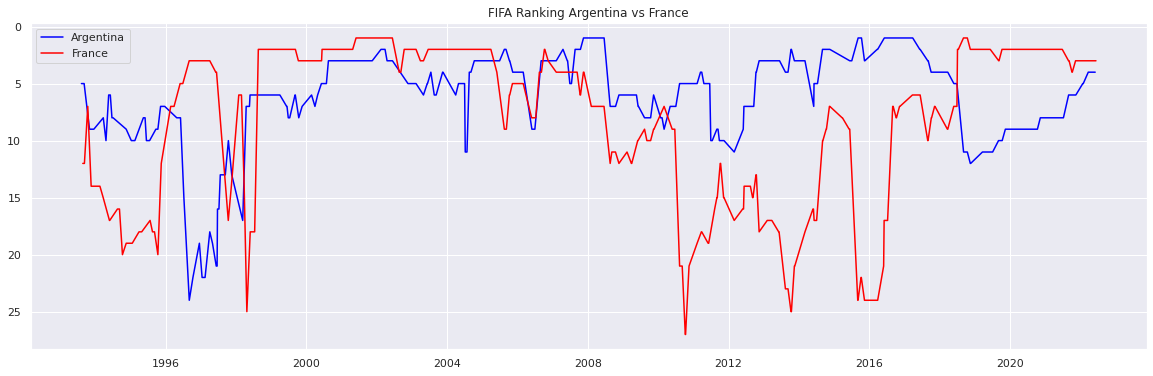

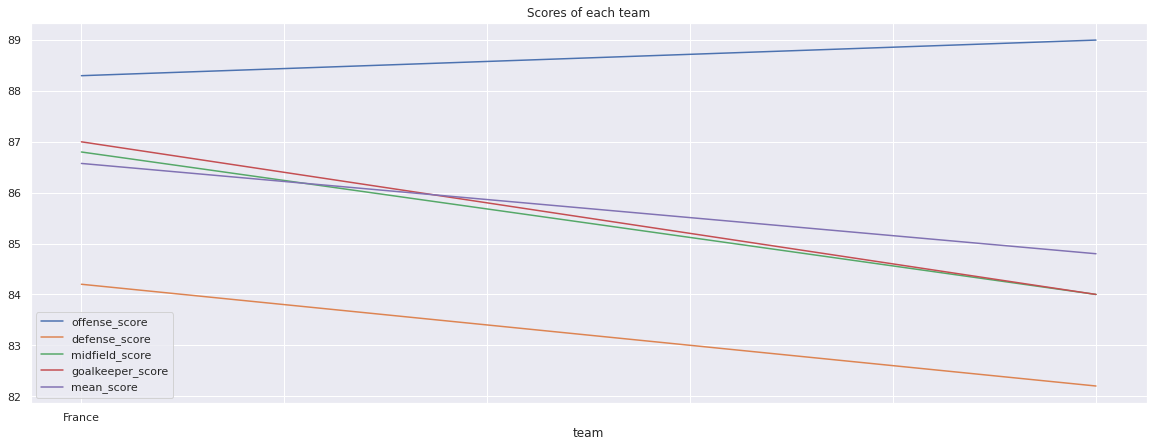

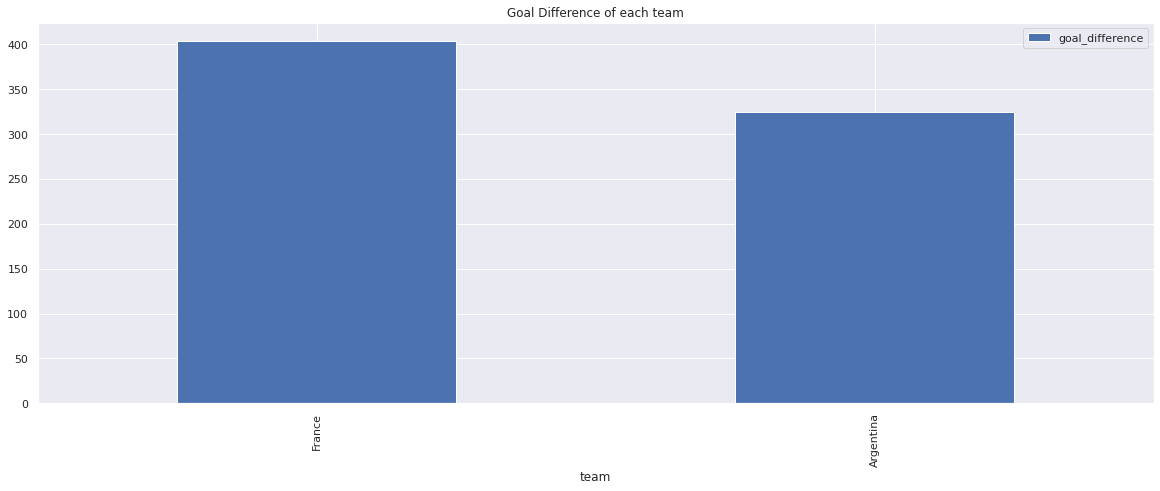

In [ ]:
#FIFA Ranking
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
argentina = fifa_rank[fifa_rank['team']=='Argentina']
france = fifa_rank[fifa_rank['team']=='France']
ax = sns.lineplot(data = argentina, x = 'date', y = 'rank', label = 'Argentina', color = "blue")
ax = sns.lineplot(data = france, x = 'date', y = 'rank', label = 'France', color = 'red' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking Argentina vs France')
plt.show()


#Matches Played
sf_m1_team = ('Argentina','France')
sf_m1 = pd.DataFrame(data[data['home_team'].isin(sf_m1_team)])
sf_m1 = pd.DataFrame(sf_m1[sf_m1['away_team'].isin(sf_m1_team)])

#Scores
sf_m1_sg = scores_goals.loc[(scores_goals['team'] == 'Argentina') | (scores_goals['team'] == 'France')]
sf_m1_sg = sf_m1_sg.merge(team_ranks, on='team', how='left')
sf_m1_sg_score = sf_m1_sg.drop(['Total Goals Scored','Total Goals Conceded','goal_difference','Rank'],axis=1)

# plotting graph
sf_m1_sg.plot(x="team", y=["offense_score", "defense_score",'midfield_score','goalkeeper_score','mean_score'])
plt.title("Scores of each team")
fig = plt.gcf()
fig.set_size_inches(20, 7)
sf_m1_sg.plot(x="team", y="goal_difference", kind="bar")
plt.title("Goal Difference of each team")
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

In [ ]:
data.head()

date home_team     away_team home_team_continent away_team_continent  \
0 1993-08-08   Bolivia       Uruguay       South America       South America   
1 1993-08-08    Brazil        Mexico       South America       North America   
2 1993-08-08   Ecuador     Venezuela       South America       South America   
3 1993-08-08    Guinea  Sierra Leone              Africa              Africa   
4 1993-08-08  Paraguay     Argentina       South America       South America   

   home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
0                   59                   22                            0   
1                    8                   14                            0   
2                   35                   94                            0   
3                   65                   86                            0   
4                   67                    5                            0   

   away_team_total_fifa_points  home_team_score  ...  \
0                            0                3  ...   
1                            0                1  ...   
2                            0                5  ...   
3                            0                1  ...   
4                            0                1  ...   

   away_team_mean_defense_score away_team_mean_offense_score  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

  away_team_mean_midfield_score  year  month home_matches away_matches  \
0                           NaN  1993      8          126          194   
1                           NaN  1993      8          233          201   
2                           NaN  1993      8          146          169   
3                           NaN  1993      8          103           84   
4                           NaN  1993      8          121          177   

                       Home_Away  continent_home_matches  \
0  South America - South America                    1839   
1  South America - North America                    1839   
2  South America - South America                    1839   
3                Africa - Africa                    5885   
4  South America - South America                    1839   

   continent_away_matches  
0                    2161  
1                    2703  
2                    2161  
3                    6306  
4                    2161  

[5 rows x 32 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           23921 non-null  datetime64[ns]
 1   home_team                      23921 non-null  object        
 2   away_team                      23921 non-null  object        
 3   home_team_continent            23921 non-null  object        
 4   away_team_continent            23921 non-null  object        
 5   home_team_fifa_rank            23921 non-null  int64         
 6   away_team_fifa_rank            23921 non-null  int64         
 7   home_team_total_fifa_points    23921 non-null  int64         
 8   away_team_total_fifa_points    23921 non-null  int64         
 9   home_team_score                23921 non-null  int64         
 10  away_team_score                23921 non-null  int64         
 11  tournament     

# Model Ready Data Preparations

## Create Dataframe for model fitting

In [ ]:
# Create new dataframe for model fitting
mdf = data.drop(['date','year','month','home_matches','away_matches','Home_Away','continent_home_matches','continent_away_matches'],axis=1)

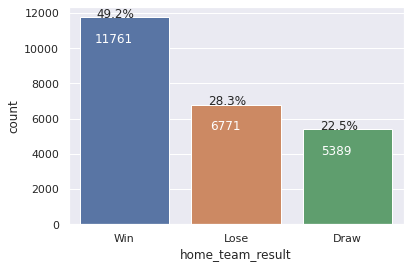

In [ ]:
ax=sns.countplot(x=mdf['home_team_result'], data=mdf,order = mdf['home_team_result'].value_counts().index);
total = len(mdf)*1.
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.15, p.get_height()+1))
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='white', size=12)

In [ ]:
# Label coding categorical variables
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

categ = ['home_team', 'away_team','home_team_continent','away_team_continent','tournament','city','country','shoot_out','home_team_result']

# Encode Categorical Columns
le = LabelEncoder()
mdf[categ] = mdf[categ].apply(le.fit_transform)

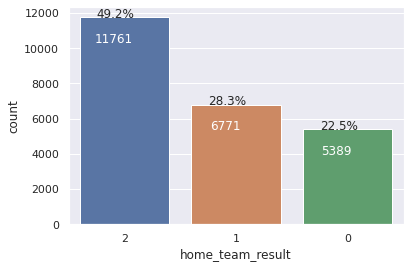

In [ ]:
ax=sns.countplot(x=mdf['home_team_result'], data=mdf,order = mdf['home_team_result'].value_counts().index);
total = len(mdf)*1.
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.15, p.get_height()+1))
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='white', size=12)

In [ ]:
# Encoding boolean data type
my_list = mdf['neutral_location']
mdf['neutral_location'] = [int(item) for item in my_list]

In [ ]:
# Converting NAs to mean score for respective teams
# May try forward flood and backward flood, common in time series, check for linear models
mdf['home_team_goalkeeper_score'] = round(mdf.groupby("home_team")["home_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))
mdf['away_team_goalkeeper_score'] = round(mdf.groupby("away_team")["away_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))
mdf['home_team_mean_defense_score'] = round(mdf.groupby('home_team')['home_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))
mdf['away_team_mean_defense_score'] = round(mdf.groupby('away_team')['away_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))
mdf['home_team_mean_offense_score'] = round(mdf.groupby('home_team')['home_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))
mdf['away_team_mean_offense_score'] = round(mdf.groupby('away_team')['away_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))
mdf['home_team_mean_midfield_score'] = round(mdf.groupby('home_team')['home_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))
mdf['away_team_mean_midfield_score'] = round(mdf.groupby('away_team')['away_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))

(array([ 107.,   53.,  299.,  118.,  359.,  706., 1425., 1656., 2275.,
        2208., 2142., 1188., 1913., 1116., 1256.,  487.,  662.,  164.,
          79.,   25.]),
 array([47. , 49.5, 52. , 54.5, 57. , 59.5, 62. , 64.5, 67. , 69.5, 72. ,
        74.5, 77. , 79.5, 82. , 84.5, 87. , 89.5, 92. , 94.5, 97. ]),
 <a list of 20 Patch objects>)

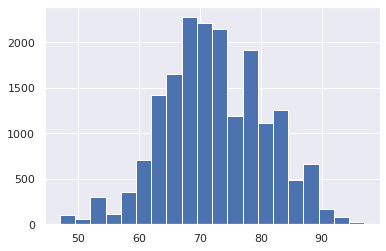

In [ ]:
plt.hist(mdf.home_team_goalkeeper_score, bins=20)

In [ ]:
mdf.isnull().sum()

home_team                           0
away_team                           0
home_team_continent                 0
away_team_continent                 0
home_team_fifa_rank                 0
away_team_fifa_rank                 0
home_team_total_fifa_points         0
away_team_total_fifa_points         0
home_team_score                     0
away_team_score                     0
tournament                          0
city                                0
country                             0
neutral_location                    0
shoot_out                           0
home_team_result                    0
home_team_goalkeeper_score       5683
away_team_goalkeeper_score       6254
home_team_mean_defense_score     8019
home_team_mean_offense_score     6995
home_team_mean_midfield_score    6955
away_team_mean_defense_score     8285
away_team_mean_offense_score     7165
away_team_mean_midfield_score    7036
dtype: int64

In [ ]:
# Converting NAs with 0 score for teams with no values
mdf.fillna(70,inplace=True)

In [ ]:
mdf.isnull().sum()

home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
dtype: int64

(array([ 107.,   53.,  299.,  118.,  359.,  706., 1425., 1656., 2275.,
        7891., 2142., 1188., 1913., 1116., 1256.,  487.,  662.,  164.,
          79.,   25.]),
 array([47. , 49.5, 52. , 54.5, 57. , 59.5, 62. , 64.5, 67. , 69.5, 72. ,
        74.5, 77. , 79.5, 82. , 84.5, 87. , 89.5, 92. , 94.5, 97. ]),
 <a list of 20 Patch objects>)

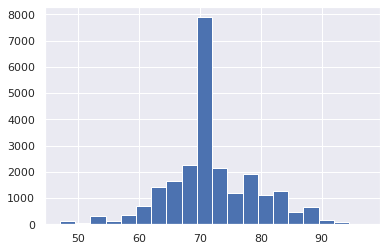

In [ ]:
plt.hist(mdf.home_team_goalkeeper_score, bins=20)

In [ ]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   home_team                      23921 non-null  int64  
 1   away_team                      23921 non-null  int64  
 2   home_team_continent            23921 non-null  int64  
 3   away_team_continent            23921 non-null  int64  
 4   home_team_fifa_rank            23921 non-null  int64  
 5   away_team_fifa_rank            23921 non-null  int64  
 6   home_team_total_fifa_points    23921 non-null  int64  
 7   away_team_total_fifa_points    23921 non-null  int64  
 8   home_team_score                23921 non-null  int64  
 9   away_team_score                23921 non-null  int64  
 10  tournament                     23921 non-null  int64  
 11  city                           23921 non-null  int64  
 12  country                        23921 non-null 

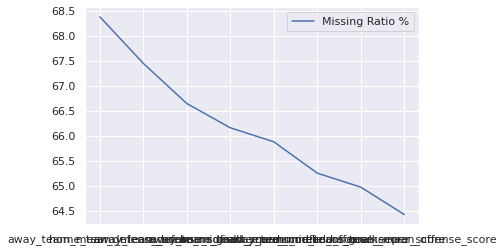

In [ ]:
data1 = data

from datetime import datetime

# convert the 'Date' column to datetime format
data1['date']= pd.to_datetime(data1['date'])

# get year from the date
data1['year'] = pd.DatetimeIndex(data1['date']).year

import seaborn as sns
data_null = pd.DataFrame(data1.isnull().sum())

import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        sns.lineplot(data=missing_data)
        #missing_data.sns.lineplot()
        plt.show()
    else:
        print('No NAs found')
plot_nas(data1)

plot_width, plot_height = (35,5)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

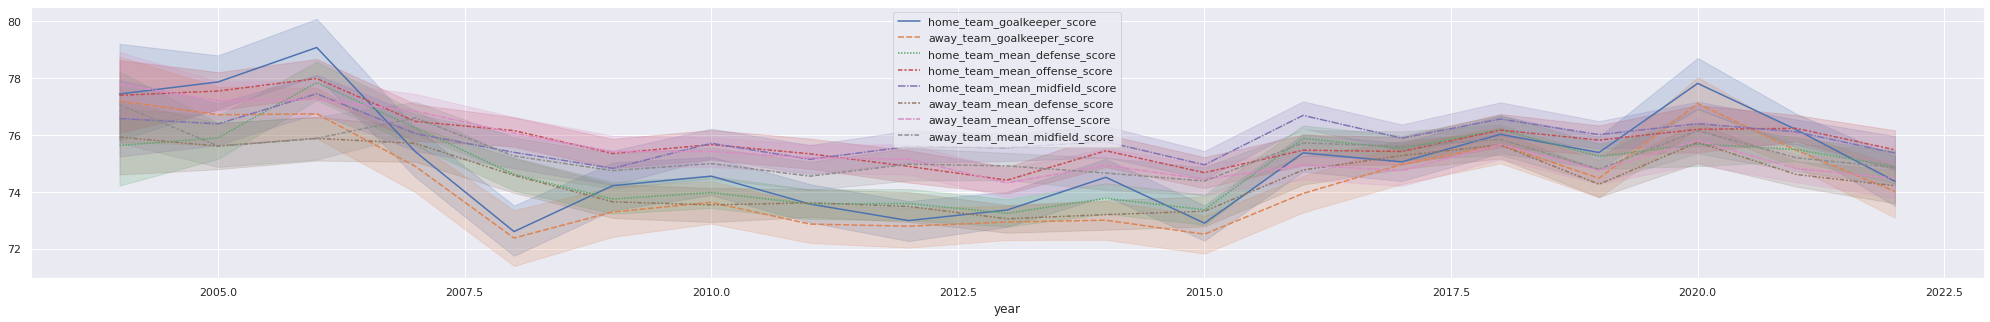

In [ ]:
import seaborn as sns
data_missing = data1
data_missing = data_missing[['year','home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score']]

data_missing = data_missing.set_index('year')
sns.lineplot(data=data_missing)

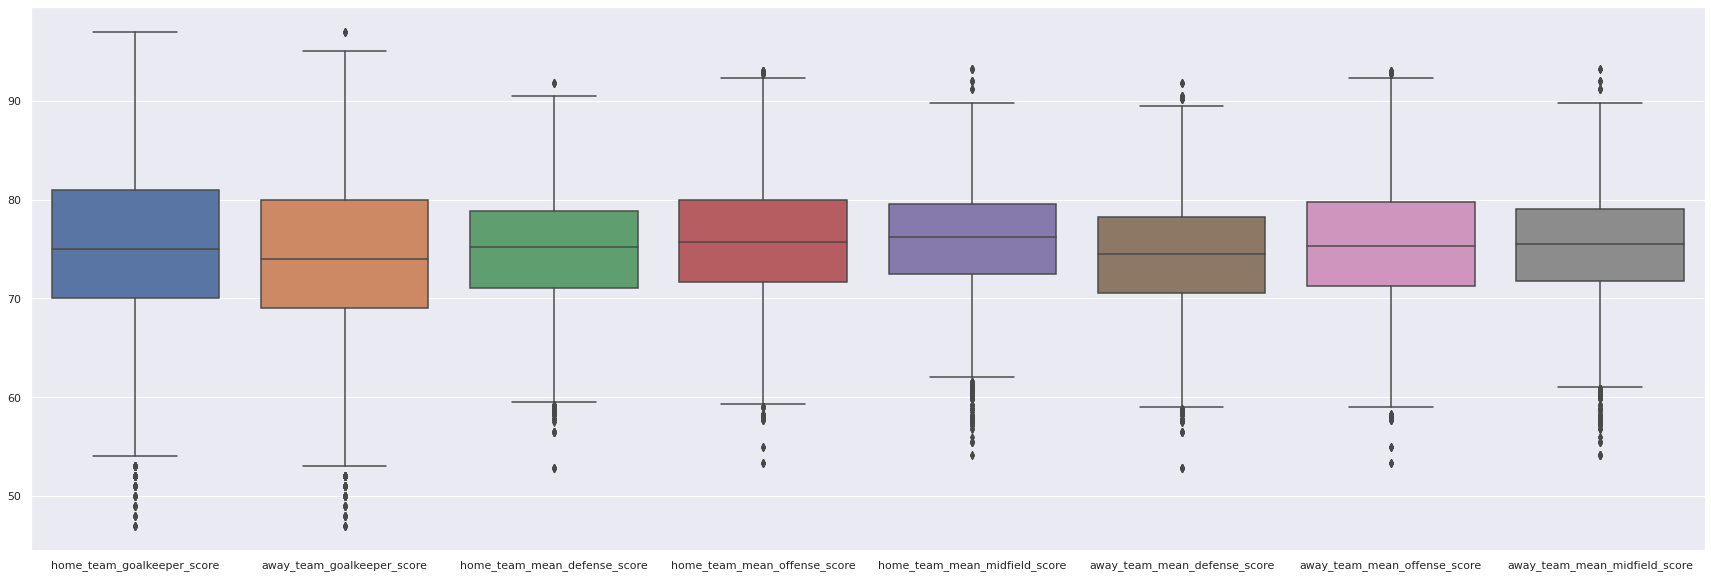

In [ ]:
sns.boxplot(data=data_missing)
# When plot object already exist
fig = plt.gcf()
fig.set_size_inches(30, 10)

23921


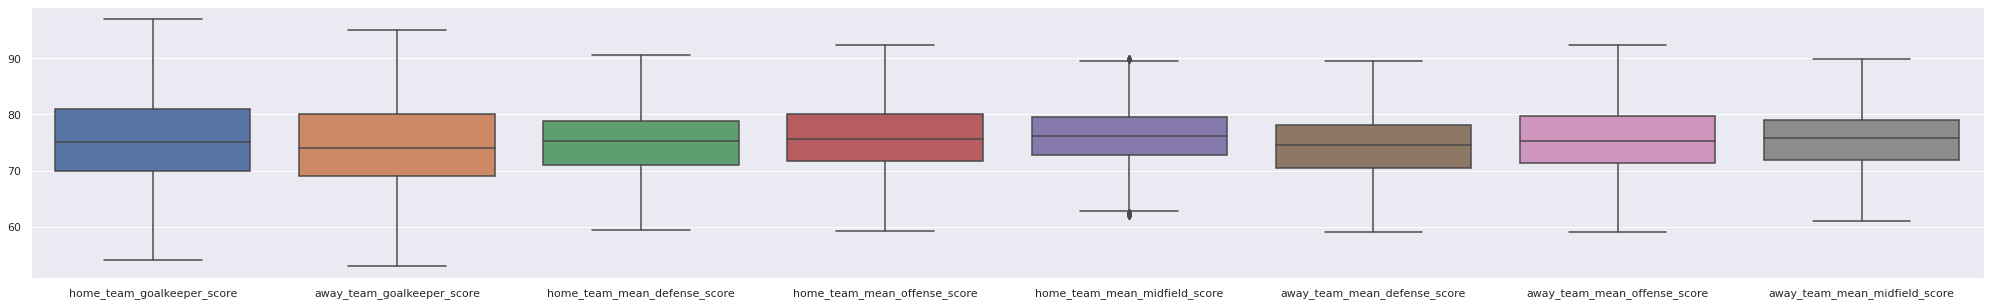

In [ ]:
#Outlier treatment using IQR method

def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

df_outlier_removed=remove_outlier_IQR(data_missing)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=data_missing.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final
    
sns.boxplot(data=df_outlier_removed)

#check number of outliers removed
print(len(data_missing.index))

## Train-Test split

In [ ]:
# Separate out Predictor and Target variables
y = mdf['home_team_result']
X = mdf.drop(['home_team_result','home_team_score','away_team_score'], axis = 1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   home_team                      23921 non-null  int64  
 1   away_team                      23921 non-null  int64  
 2   home_team_continent            23921 non-null  int64  
 3   away_team_continent            23921 non-null  int64  
 4   home_team_fifa_rank            23921 non-null  int64  
 5   away_team_fifa_rank            23921 non-null  int64  
 6   home_team_total_fifa_points    23921 non-null  int64  
 7   away_team_total_fifa_points    23921 non-null  int64  
 8   tournament                     23921 non-null  int64  
 9   city                           23921 non-null  int64  
 10  country                        23921 non-null  int64  
 11  neutral_location               23921 non-null  int64  
 12  shoot_out                      23921 non-null 

In [ ]:
from sklearn.model_selection import train_test_split
#For using Ensemble model - Adaboost
from sklearn.ensemble import AdaBoostClassifier
# For Finding otimum hyperparameter on Adaboost
from sklearn.model_selection import GridSearchCV
# For Diagnosis of classification model
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Execute Train and Test split, using Stratified sampling
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400,stratify=y)

In [ ]:
y_train.value_counts()

2    9408
1    5417
0    4311
Name: home_team_result, dtype: int64

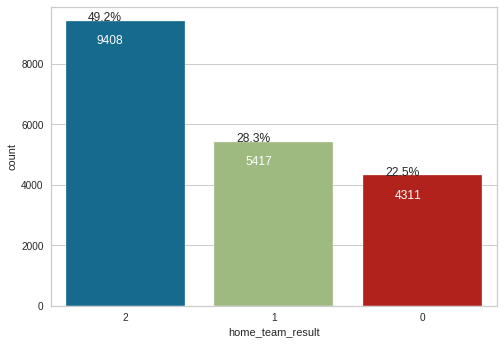

In [ ]:
ax=sns.countplot(y_train,order = y_train.value_counts().index)
total = len(y_train)*1.
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.15, p.get_height()+1))
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='white', size=12)

In [ ]:
y_test.value_counts()

2    2353
1    1354
0    1078
Name: home_team_result, dtype: int64

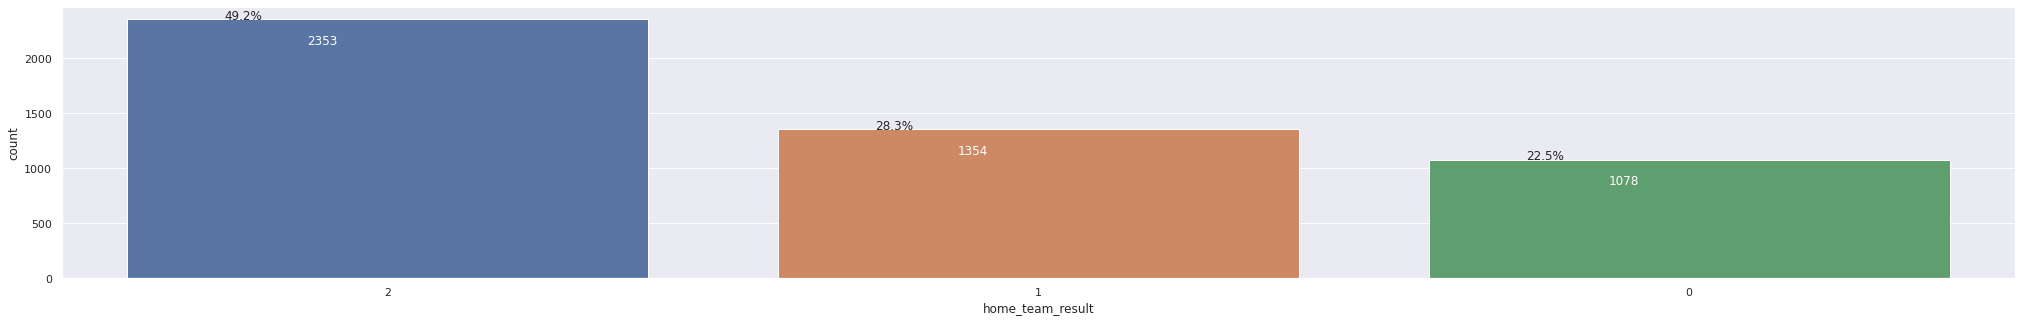

In [ ]:
ax=sns.countplot(x=y_test, data=y_test,order = y_test.value_counts().index);
total = len(y_test)*1.
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.15, p.get_height()+1))
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='white', size=12)

# Machine Learning Models

## ADABOOST Model

Model score : 0.5818181818181818


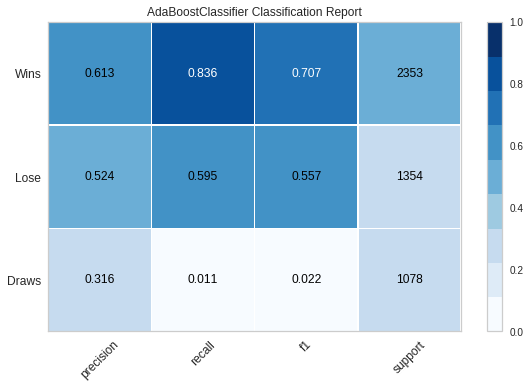

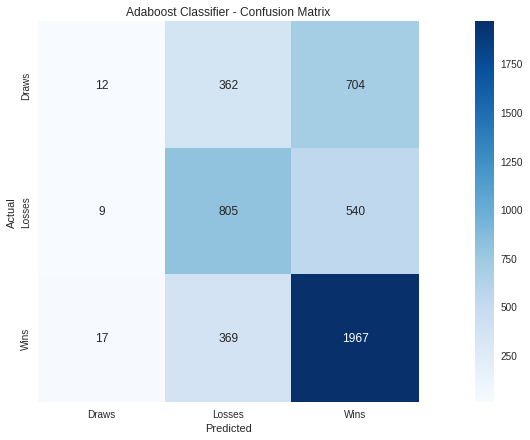

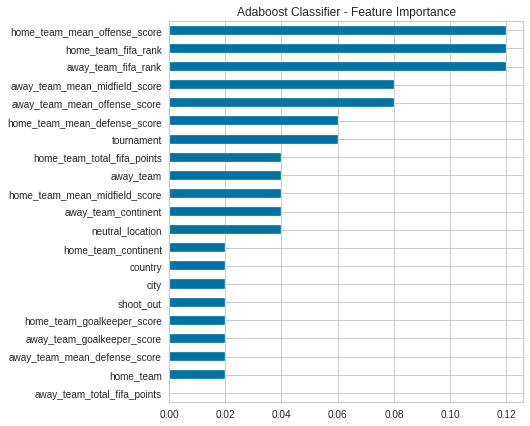

In [ ]:
# ADABOOST
adb_clf=AdaBoostClassifier(random_state=400)
adb_clf.fit(X_train,y_train)
print("Model score :",adb_clf.score(X_test,y_test))

#y_train_predicted = adb_clf.predict(X_train)
y_test_predicted = adb_clf.predict(X_test)

# Classification Report
#print(classification_report(y_train, y_train_predicted))
#print(classification_report(y_test, y_test_predicted))
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(AdaBoostClassifier(),support=True,cmap='Blues',classes=['Draws','Lose','Wins'],size=(583, 400))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_test_predicted, labels=adb_clf.classes_)
labels = ["Draws", "Losses", "Wins"]
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, square=True,cmap='Blues', cbar=True, fmt='g')
ax.set_ylim(0, 3) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title("Adaboost Classifier - Confusion Matrix")
ax.invert_yaxis() #optional
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

# Feature Importance
adb_clf_fi = pd.Series(adb_clf.feature_importances_,index=X.columns)
adb_clf_fi.sort_values(ascending=True).plot(kind='barh')
plt.title("Adaboost Classifier - Feature Importance")
plt.grid('False')
fig = plt.gcf()
fig.set_size_inches(6.35, 7)
plt.show(fig)

##ADABOOST - Hyperparameter tuning

Model score : 0.5903866248693835
{'learning_rate': 0.1, 'n_estimators': 180}


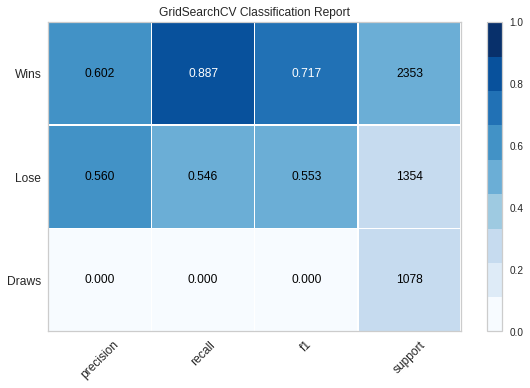

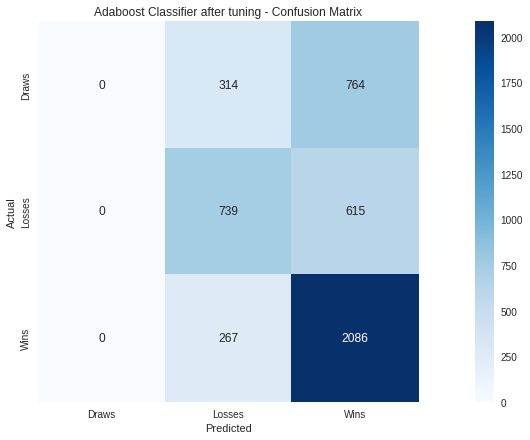

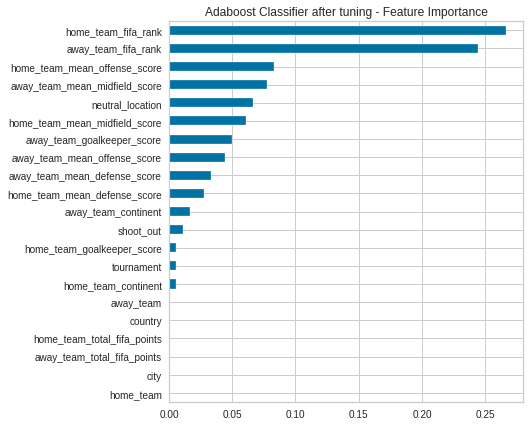

In [ ]:
# Define the parameter grid
param_grid_adb = {'n_estimators': [80,100,120,140,160,180],
              'learning_rate': [0.1, 0.5, 1.0]}

# Create the grid search object
adb_gs = GridSearchCV(estimator=adb_clf, param_grid=param_grid_adb, cv=5)

# Fit the grid search to the data
adb_gs.fit(X_train,y_train)

print("Model score :",adb_gs.score(X_test,y_test))

#y_train_predicted = adb_gs.predict(X_train)
y_test_predicted = adb_gs.predict(X_test)

# Print the best hyperparameters
print(adb_gs.best_params_)

# Classification Report
#print(classification_report(y_train, y_train_predicted))
#print(classification_report(y_test, y_test_predicted))
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(adb_gs,support=True,cmap='Blues',classes=['Draws','Lose','Wins'],size=(583, 400))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_test_predicted, labels=adb_gs.classes_)
labels = ["Draws", "Losses", "Wins"]
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, square=True,cmap='Blues', cbar=True, fmt='g')
ax.set_ylim(0, 3) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title("Adaboost Classifier after tuning - Confusion Matrix")
ax.invert_yaxis() #optional
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

# Feature Importance
adb_gs_fi = pd.Series(adb_gs.best_estimator_.feature_importances_,index=X.columns)
adb_gs_fi.sort_values(ascending=True).plot(kind='barh')
plt.title("Adaboost Classifier after tuning - Feature Importance")
plt.grid('False')
fig = plt.gcf()
fig.set_size_inches(6.35, 7)
plt.show(fig)

## RANDOM FOREST model

Model score : 0.567189132706374


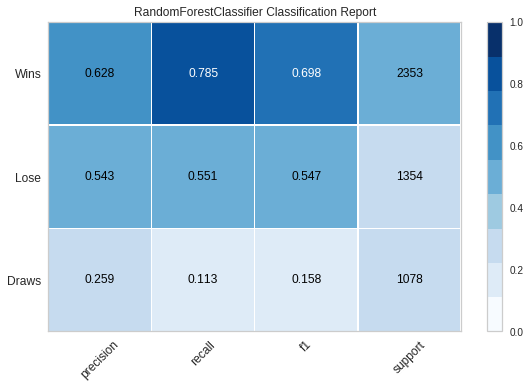

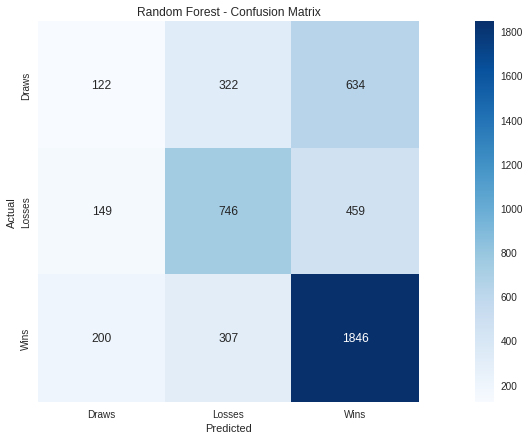

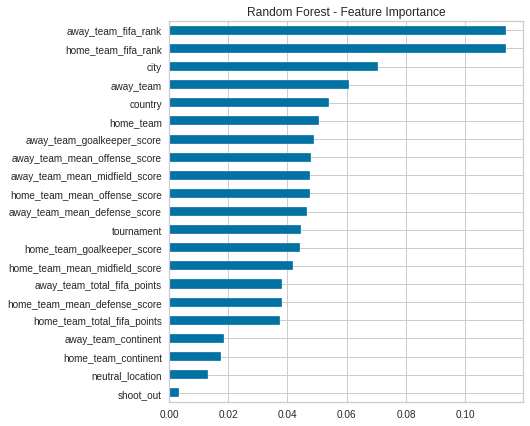

In [ ]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(random_state=400)
rf_clf.fit(X_train,y_train)
print("Model score :",rf_clf.score(X_test,y_test))

y_train_predicted = rf_clf.predict(X_train)
y_test_predicted = rf_clf.predict(X_test)

# Classification Report
#print(classification_report(y_train, y_train_predicted))
#print(classification_report(y_test, y_test_predicted))
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(rf_clf,support=True,cmap='Blues',classes=['Draws','Lose','Wins'],size=(583, 400))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_test_predicted, labels=rf_clf.classes_)
labels = ["Draws", "Losses", "Wins"]
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, square=True,cmap='Blues', cbar=True, fmt='g')
ax.set_ylim(0, 3) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title("Random Forest - Confusion Matrix")
ax.invert_yaxis() #optional
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

# Feature Importance
rf_clf_fi = pd.Series(rf_clf.feature_importances_,index=X.columns)
rf_clf_fi.sort_values(ascending=True).plot(kind='barh')
plt.title("Random Forest - Feature Importance")
plt.grid('False')
fig = plt.gcf()
fig.set_size_inches(6.35, 7)
plt.show(fig)

##RANDOM FOREST - Hyperparameter tuning

Model score : 0.5951933124346918
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


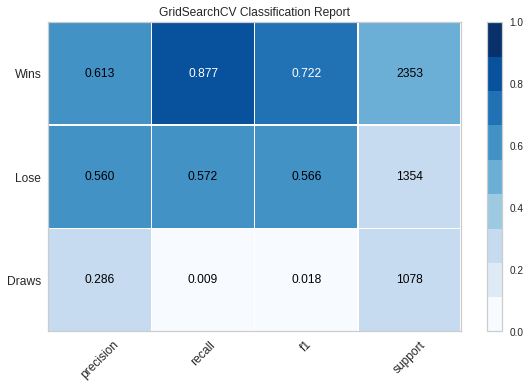

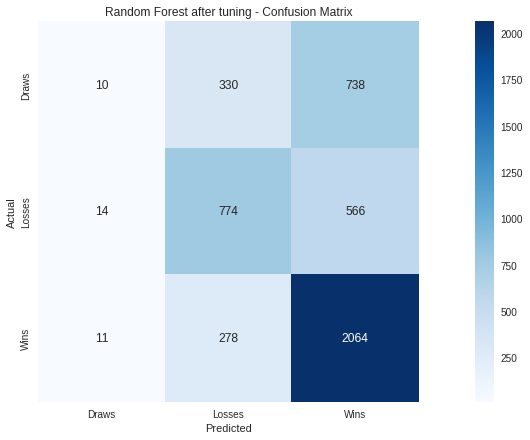

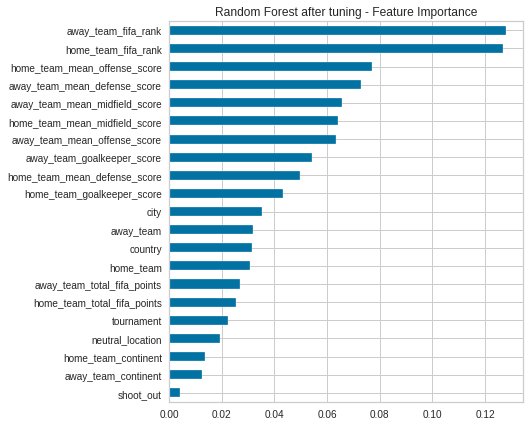

In [ ]:
# Define the parameter grid
param_grid_rf = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10,15,20],
              'min_samples_split': [2, 5, 10]}

# Create the grid search object
rf_gs = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5)

# Fit the grid search to the data
rf_gs.fit(X_train,y_train)
print("Model score :",rf_gs.score(X_test,y_test))

# Print the best hyperparameters
print(rf_gs.best_params_)

y_train_predicted = rf_gs.predict(X_train)
y_test_predicted = rf_gs.predict(X_test)

# Classification Report
#print(classification_report(y_train, y_train_predicted))
#print(classification_report(y_test, y_test_predicted))
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(rf_gs,support=True,cmap='Blues',classes=['Draws','Lose','Wins'],size=(583, 400))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_test_predicted, labels=rf_gs.classes_)
labels = ["Draws", "Losses", "Wins"]
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, square=True,cmap='Blues', cbar=True, fmt='g')
ax.set_ylim(0, 3) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title("Random Forest after tuning - Confusion Matrix")
ax.invert_yaxis() #optional
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

# Feature Importance
rf_gs_fi = pd.Series(rf_gs.best_estimator_.feature_importances_,index=X.columns)
rf_gs_fi.sort_values(ascending=True).plot(kind='barh')
plt.title("Random Forest after tuning - Feature Importance")
plt.grid('False')
fig = plt.gcf()
fig.set_size_inches(6.35, 7)
plt.show(fig)

## XGBOOST model

Model score : 0.5901776384535006
Mean cross-validation score: 0.59
K-fold CV average score: 0.59


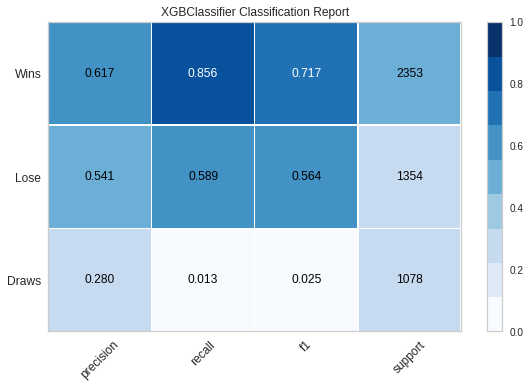

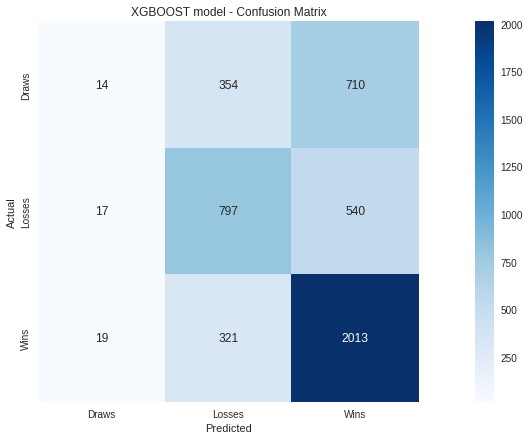

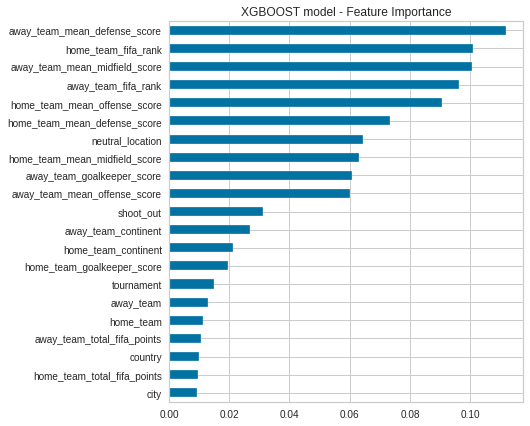

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

xgbc = XGBClassifier(random_state=400)
xgbc.fit(X_train,y_train)
print("Model score :",xgbc.score(X_test,y_test))

#y_train_predicted = xgbc.predict(X_train)
y_test_predicted = xgbc.predict(X_test)

# - cross validataion
scores = cross_val_score(xgbc, X_train,y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())
# - KFold cross validataion
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train,y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


# Classification Report
#print(classification_report(y_train, y_train_predicted))
#print(classification_report(y_test, y_test_predicted))
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(xgbc,support=True,cmap='Blues',classes=['Draws','Lose','Wins'],size=(583, 400))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_test_predicted, labels=xgbc.classes_)
labels = ["Draws", "Losses", "Wins"]
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, square=True,cmap='Blues', cbar=True, fmt='g')
ax.set_ylim(0, 3) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title("XGBOOST model - Confusion Matrix")
ax.invert_yaxis() #optional
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

# Feature Importance
xgbc_fi = pd.Series(xgbc.feature_importances_,index=X.columns)
xgbc_fi.sort_values(ascending=True).plot(kind='barh')
plt.title("XGBOOST model - Feature Importance")
plt.grid('False')
fig = plt.gcf()
fig.set_size_inches(6.35, 7)
plt.show(fig)

In [ ]:
# XGBoost
# n_jobs=-1 to allow run it on all cores
#params = {
#    'n_estimators': [100, 200, 500],
#    'learning_rate': [0.01,0.05,0.1],
#    'booster': ['gbtree', 'gblinear'],
#    'gamma': [0, 0.5, 1],
#    'reg_alpha': [0, 0.5, 1],
#    'reg_lambda': [0.5, 1, 5],
#    'base_score': [0.2, 0.5, 1]
#}

#xg_gs = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
#xg_gs.fit(X_train, y_train)

#print('Best score:', xg_gs.best_score_)
#print('Best score:', xg_gs.best_params_)

##DECISION TREE model

Model score : 0.4652037617554859


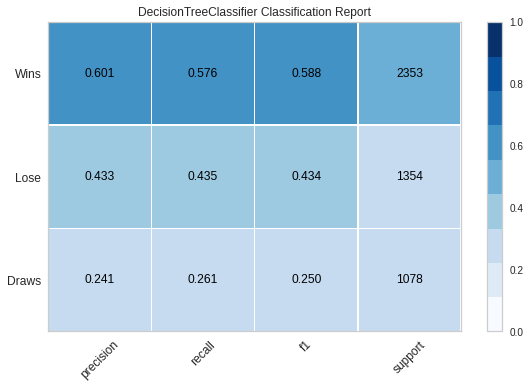

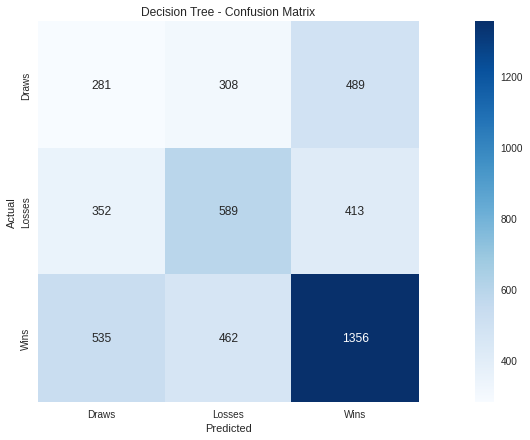

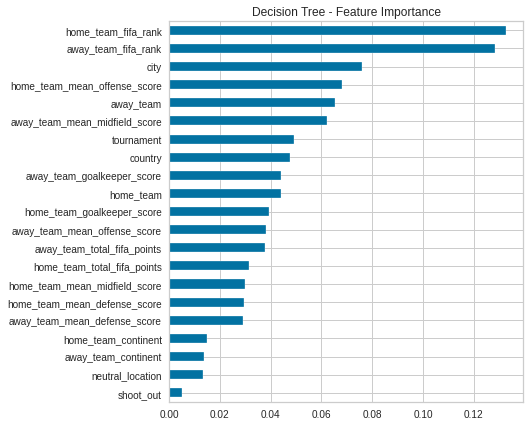

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dt_clf = DecisionTreeClassifier(random_state=400)

# Train Decision Tree Classifer
dt_clf = dt_clf.fit(X_train,y_train)

print("Model score :",dt_clf.score(X_test,y_test))

#y_train_predicted = dt_clf.predict(X_train)
y_test_predicted = dt_clf.predict(X_test)

# Classification Report
#print(classification_report(y_train, y_train_predicted))
#print(classification_report(y_test, y_test_predicted))
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(dt_clf,support=True,cmap='Blues',classes=['Draws','Lose','Wins'],size=(583, 400))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_test_predicted, labels=dt_clf.classes_)
labels = ["Draws", "Losses", "Wins"]
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, square=True,cmap='Blues', cbar=True, fmt='g')
ax.set_ylim(0, 3) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title("Decision Tree - Confusion Matrix")
ax.invert_yaxis() #optional
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

# Feature Importance
dt_clf_fi = pd.Series(dt_clf.feature_importances_,index=X.columns)
dt_clf_fi.sort_values(ascending=True).plot(kind='barh')
plt.title("Decision Tree - Feature Importance")
plt.grid('False')
fig = plt.gcf()
fig.set_size_inches(6.35, 7)
plt.show(fig)

## DECISION TREE model - Hyper Parameter tuning

Fitting 5 folds for each of 2016 candidates, totalling 10080 fits
Model score : 0.5531870428422152
{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2}


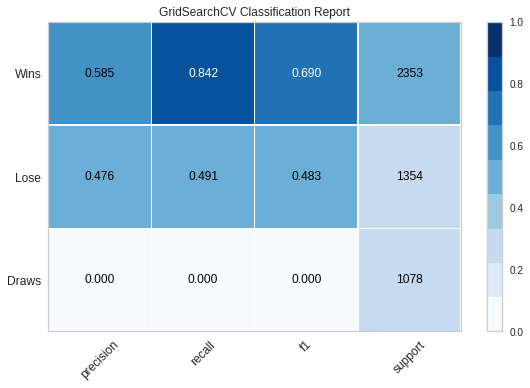

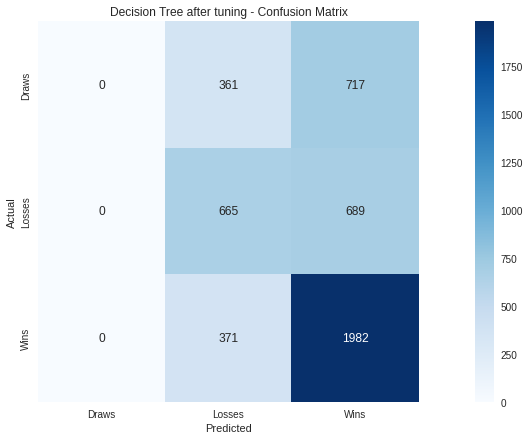

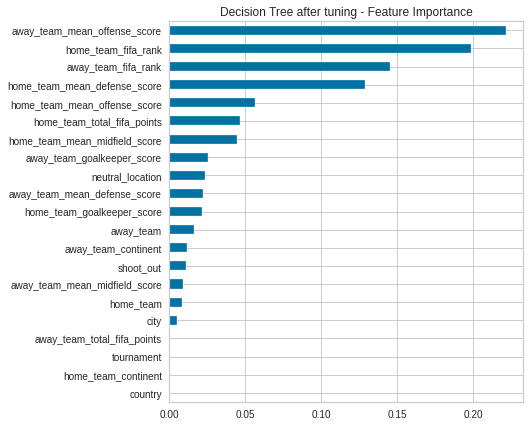

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001, .0001],
              'max_depth' : [5, 6, 7, 8, 9,10,11],
              'criterion' :['gini', 'entropy'],
              # for Pruning
              'min_samples_split': [1,2,3,4],
              'min_samples_leaf': [1,2,3]
             }
dt_gs = DecisionTreeClassifier(random_state=400)
dt_gs = GridSearchCV(estimator=dt_gs, param_grid=param_grid, cv=5, verbose=True)

# Fit the grid search to the data
dt_gs.fit(X_train,y_train)

print("Model score :",dt_gs.score(X_test,y_test))

#y_train_predicted = adb_gs.predict(X_train)
y_test_predicted = dt_gs.predict(X_test)

# Print the best hyperparameters
print(dt_gs.best_params_)

# Classification Report
#print(classification_report(y_train, y_train_predicted))
#print(classification_report(y_test, y_test_predicted))
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(dt_gs,support=True,cmap='Blues',classes=['Draws','Lose','Wins'],size=(583, 400))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_test_predicted, labels=dt_gs.classes_)
labels = ["Draws", "Losses", "Wins"]
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, square=True,cmap='Blues', cbar=True, fmt='g')
ax.set_ylim(0, 3) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title("Decision Tree after tuning - Confusion Matrix")
ax.invert_yaxis() #optional
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

# Feature Importance
dt_gs_fi = pd.Series(dt_gs.best_estimator_.feature_importances_,index=X.columns)
dt_gs_fi.sort_values(ascending=True).plot(kind='barh')
plt.title("Decision Tree after tuning - Feature Importance")
plt.grid('False')
fig = plt.gcf()
fig.set_size_inches(6.35, 7)
plt.show(fig)

## SUPPORT VECTOR MACHINES CLASSIFIER Model

Model score : 0.5814002089864159


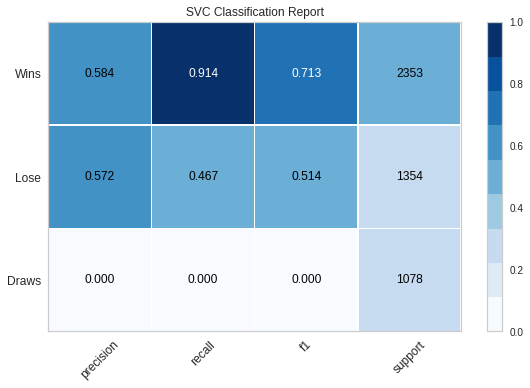

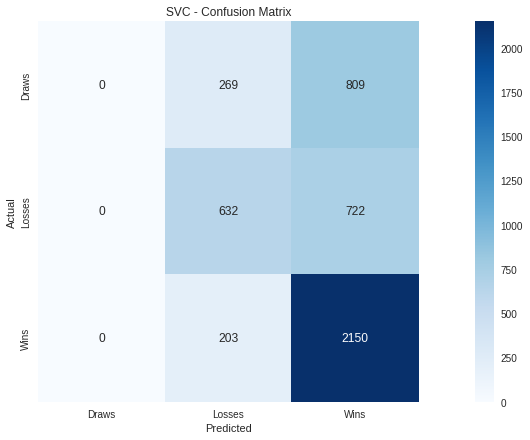

Text(0.5, 0, 'Permutation Importance')

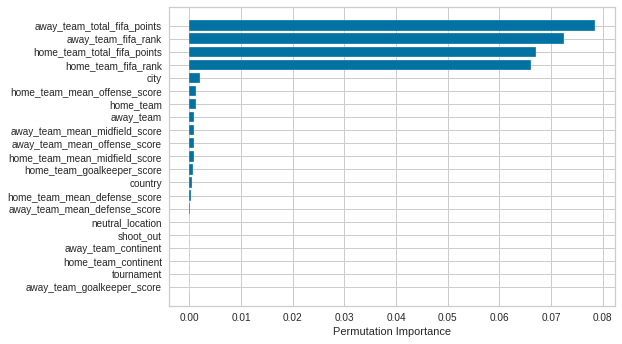

In [ ]:
from sklearn.svm import SVC
#from sklearn.svm import LinearSVC

# train the model on train set
svc = SVC(random_state=400)
#svc = LinearSVC(random_state=400)
svc.fit(X_train, y_train)
  
print("Model score :",svc.score(X_test,y_test))

y_test_predicted = svc.predict(X_test)

# Classification Report
#print(classification_report(y_train, y_train_predicted))
#print(classification_report(y_test, y_test_predicted))
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(svc,support=True,cmap='Blues',classes=['Draws','Lose','Wins'],size=(583, 400))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_test_predicted, labels=svc.classes_)
labels = ["Draws", "Losses", "Wins"]
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, square=True,cmap='Blues', cbar=True, fmt='g')
ax.set_ylim(0, 3) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title("SVC - Confusion Matrix")
ax.invert_yaxis() #optional
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(svc, X_test, y_test)
#feature_names = ['feature1', 'feature2', 'feature3', ...... ]
features = np.array(X.columns)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
#from sklearn.model_selection import GridSearchCV
  
# defining parameter range

#param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']} 

#param_grid = {'C': [0.1, 1], 
#              'gamma': [1, 0.1],
#             'kernel': ['rbf']} 
  
#svc_gs = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
#svc_gs.fit(X_train, y_train)

#print("Model score :",svc_gs.score(X_test,y_test))

# print best parameter after tuning
#print(svc_gs.best_params_)
  
# print how our model looks after hyper-parameter tuning
#print(svc_gs.best_estimator_)

##Multi-layer Perceptron (MLP) Neural Network Classifier

Model score : 0.5373040752351097


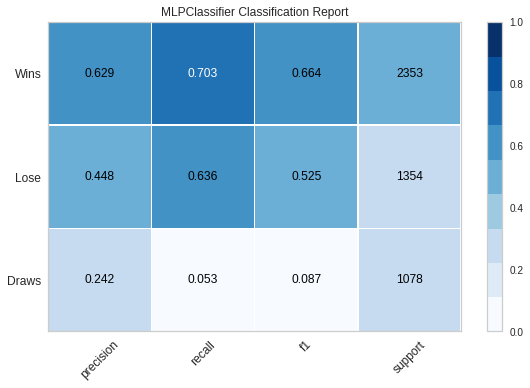

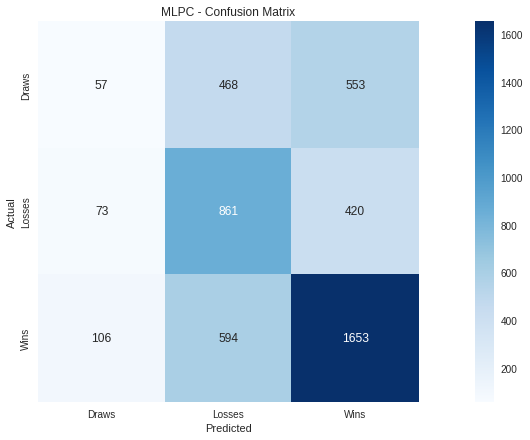

In [ ]:
from sklearn.neural_network import MLPClassifier

# Making the Neural Network Classifier
nn_clf = MLPClassifier(random_state=400)

# Training the model on the training data and labels
nn_clf.fit(X_train, y_train)

print("Model score :",nn_clf.score(X_test,y_test))

y_test_predicted = nn_clf.predict(X_test)

# Classification Report
#print(classification_report(y_train, y_train_predicted))
#print(classification_report(y_test, y_test_predicted))
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(nn_clf,support=True,cmap='Blues',classes=['Draws','Lose','Wins'],size=(583, 400))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_test_predicted, labels=nn_clf.classes_)
labels = ["Draws", "Losses", "Wins"]
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, square=True,cmap='Blues', cbar=True, fmt='g')
ax.set_ylim(0, 3) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title("MLPC - Confusion Matrix")
ax.invert_yaxis() #optional
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

## KNeighbors Classifier Model

Model score : 0.4909090909090909


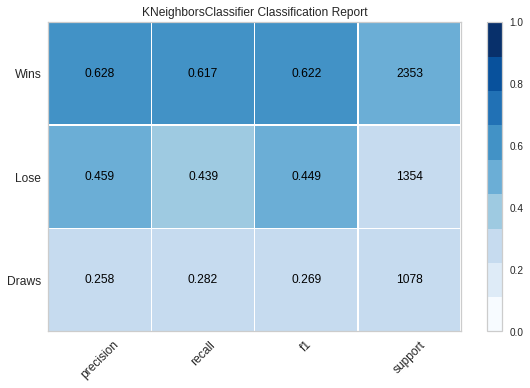

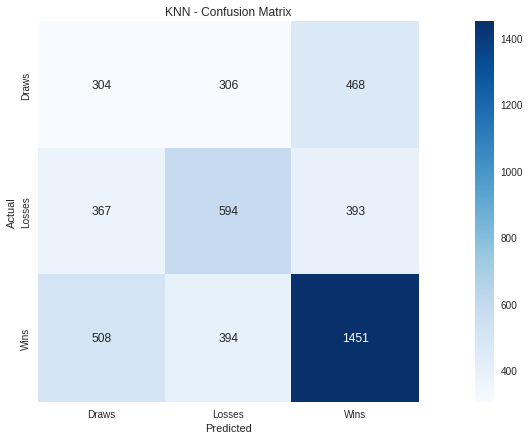

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print("Model score :",knn_clf.score(X_test,y_test))

y_test_predicted = knn_clf.predict(X_test)

# Classification Report
#print(classification_report(y_train, y_train_predicted))
#print(classification_report(y_test, y_test_predicted))
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(knn_clf,support=True,cmap='Blues',classes=['Draws','Lose','Wins'],size=(583, 400))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_test_predicted, labels=knn_clf.classes_)
labels = ["Draws", "Losses", "Wins"]
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, square=True,cmap='Blues', cbar=True, fmt='g')
ax.set_ylim(0, 3) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title("KNN - Confusion Matrix")
ax.invert_yaxis() #optional
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=400)
log_clf = log_clf.fit(X_train, y_train)

print("Model score :",log_clf.score(X_test,y_test))

y_test_predicted = log_clf.predict(X_test)

# Classification Report
#print(classification_report(y_train, y_train_predicted))
#print(classification_report(y_test, y_test_predicted))
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(log_clf,support=True,cmap='Blues',classes=['Draws','Lose','Wins'],size=(583, 400))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_test_predicted, labels=log_clf.classes_)
labels = ["Draws", "Losses", "Wins"]
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, square=True,cmap='Blues', cbar=True, fmt='g')
ax.set_ylim(0, 3) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title("Logistic Regressions - Confusion Matrix")
ax.invert_yaxis() #optional
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

summary = pd.DataFrame(zip(X.columns, np.transpose(log_clf.coef_.tolist()[0])), 
                       columns=['features', 'coef']).sort_values('coef',ascending=True)
# Plot a bar chart
summary.plot.barh(x='features', y='coef',
             title='Feature Coefficient - Logistics Regression')

## CONFUSION MATRIX - Comparision

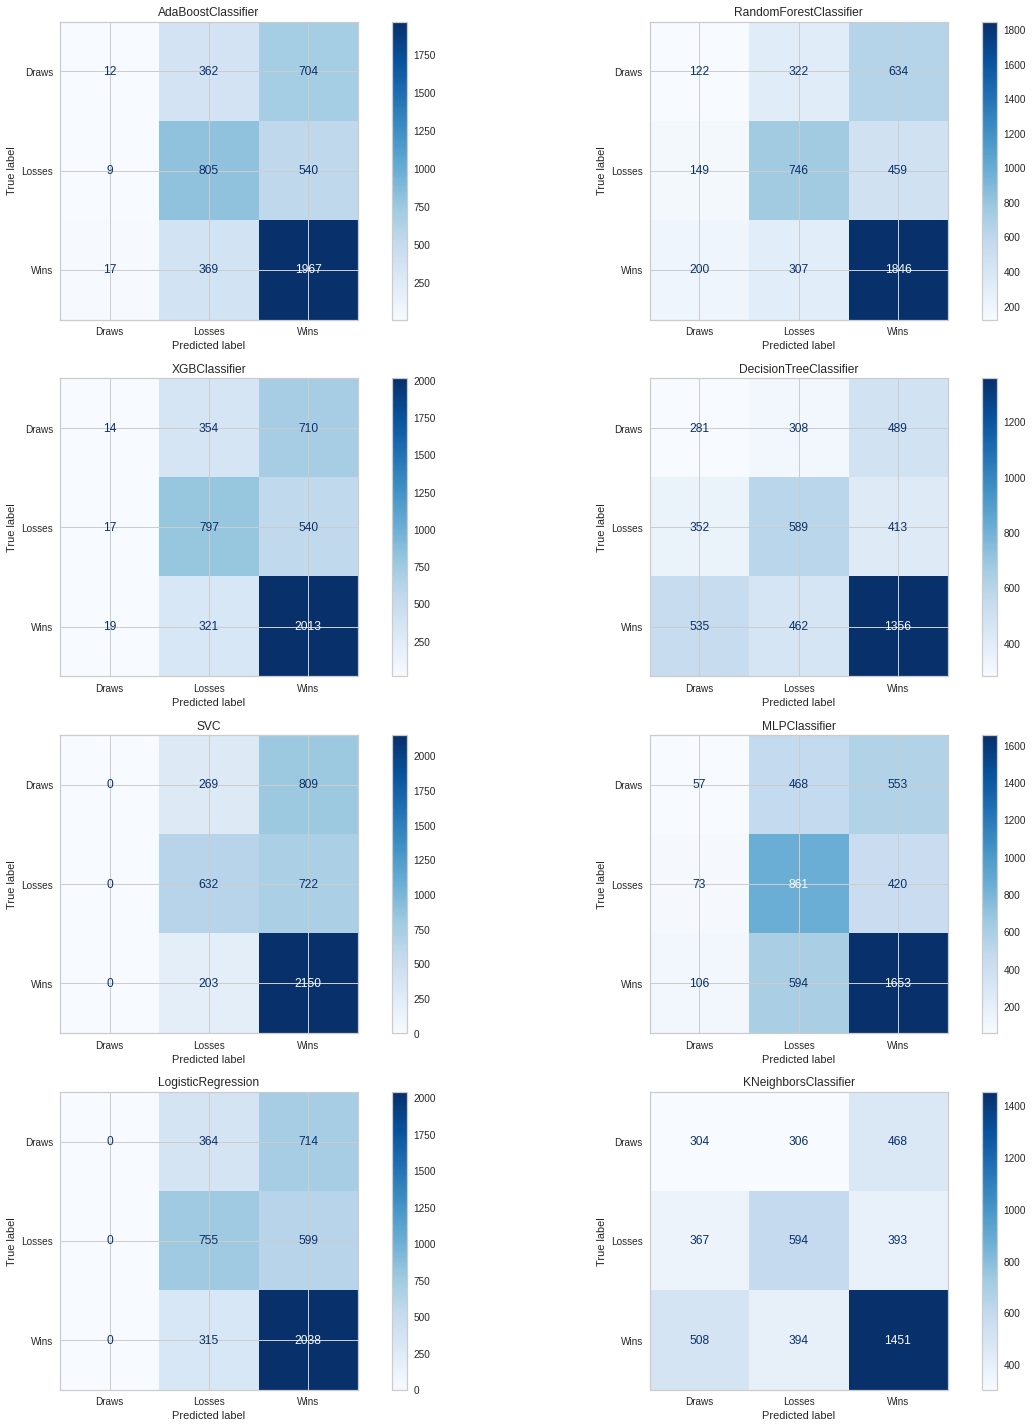

In [ ]:
from sklearn.metrics import plot_confusion_matrix
classifiers = [ 
               AdaBoostClassifier(random_state=400),
               RandomForestClassifier(random_state=400),
               XGBClassifier(random_state=400),
               DecisionTreeClassifier(random_state=400),
               SVC(random_state=400),
               MLPClassifier(random_state=400),
               LogisticRegression(random_state=400),
               KNeighborsClassifier()
] 
               
               
for cls in classifiers:
    cls.fit(X_train, y_train)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18,20))
plt.grid(False)
labels = ["Draws", "Losses", "Wins"]

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax,
                          cmap='Blues',
                         display_labels=labels)
    ax.title.set_text(type(cls).__name__)

plt.tight_layout()  
plt.show()

## CLASSIFICATION REPORT - comparision

In [ ]:
classifiers = [ 
               AdaBoostClassifier(random_state=400),
               RandomForestClassifier(random_state=400),
               XGBClassifier(random_state=400),
               DecisionTreeClassifier(random_state=400),
               SVC(random_state=400),
               MLPClassifier(random_state=400),
               LogisticRegression(random_state=400),
               KNeighborsClassifier()
] 
               
               
for cls in classifiers:
    cls.fit(X_train, y_train)

#fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18,20))
#plt.grid(False)
#labels = ["Draws", "Losses", "Wins"]

for cls, ax in zip(classifiers, axes.flatten()):
    viz = ClassificationReport(cls,support=True,cmap='Blues',classes=['Draws','Lose','Wins'],size=(583, 400))
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()
    ax.title.set_text(type(cls).__name__)


#plt.tight_layout()  
#plt.show()

In [ ]:
print('Adaboost Model\n',classification_report(y_test, adb_clf.predict(X_test)))
print('Random Forest Model\n',classification_report(y_test, rf_clf.predict(X_test)))
print('XGB Model\n',classification_report(y_test, xgbc.predict(X_test)))
print('Decision tree Model\n',classification_report(y_test, dt_clf.predict(X_test)))
print('SVC Model\n',classification_report(y_test, svc.predict(X_test)))
print('MLPC Model\n',classification_report(y_test, nn_clf.predict(X_test)))
print('KNN Model\n',classification_report(y_test, knn_clf.predict(X_test)))
print('Logistic Regression Model\n',classification_report(y_test, log_clf.predict(X_test)))

##Precision Recall Curve

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    RandomForestClassifier(random_state=400),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(RandomForestClassifier(random_state=400), classes=["Draws", "Lose", 'Wins'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    AdaBoostClassifier(random_state=400),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(AdaBoostClassifier(random_state=400), classes=["Draws", "Lose", 'Wins'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

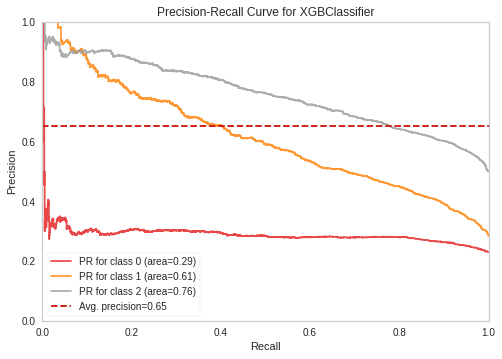

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    XGBClassifier(random_state=400),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    DecisionTreeClassifier(random_state=400),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(DecisionTreeClassifier(random_state=400), classes=["Draws", "Lose", 'Wins'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    SVC(random_state=400),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(SVC(random_state=400), classes=["Draws", "Lose", 'Wins'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    MLPClassifier(random_state=400),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(MLPClassifier(random_state=400), classes=["Draws", "Lose", 'Wins'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

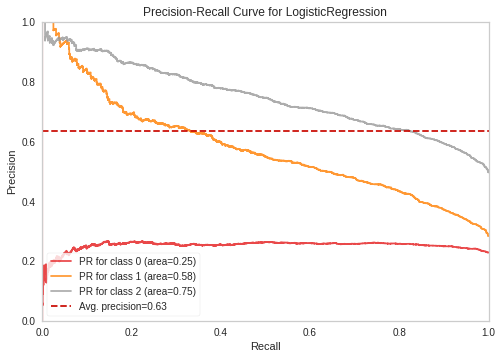

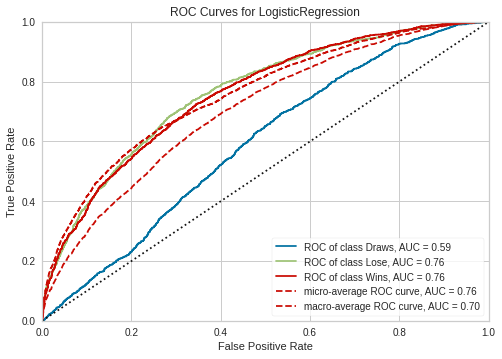

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(random_state=400),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(LogisticRegression(random_state=400), classes=["Draws", "Lose", 'Wins'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    KNeighborsClassifier(),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(KNeighborsClassifier(), classes=["Draws", "Lose", 'Wins'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure


12 Jan Session
* Precision Curve chart for all classifier for story telling
* ROC curve could also be drawn
* Reduce dimension to improve acurancy manually
* PCA cover in theory
* choose 3 models and start preparation for presentation
* Next session on 25 Jan 2023 for presentation walkthrough
* One session on interview prep during the end







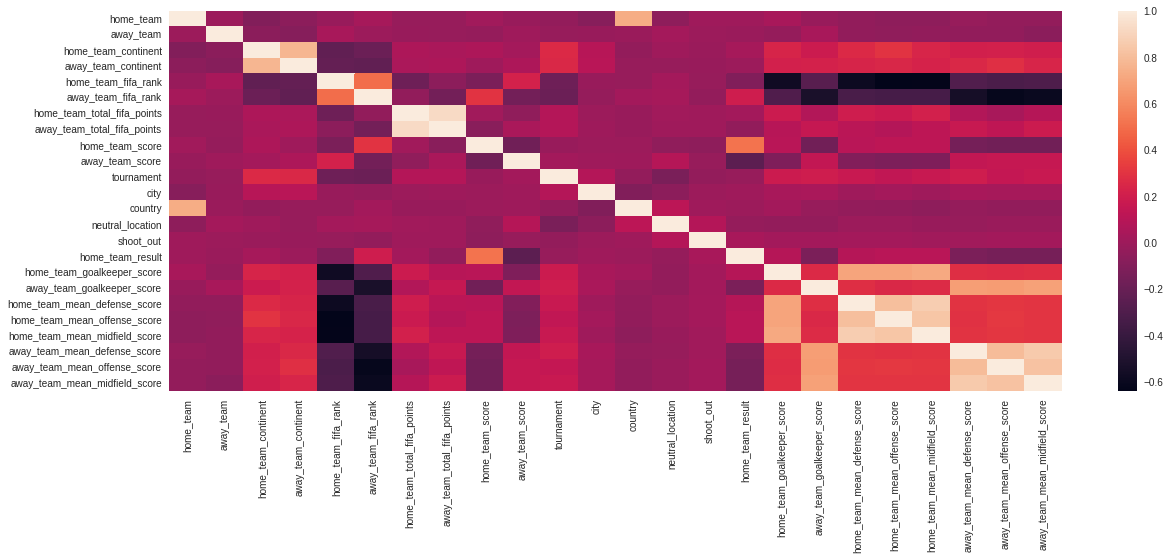

In [ ]:
sns.heatmap(mdf.corr())
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show(fig)

 BYOP presentation

 - Problem Statement
 - EDA
  - Visualisation
 - Data manipulations
 - Classification models
  - Accuracy and classifcation reports